<a href="https://colab.research.google.com/github/Vladzzkuznetsov/Raschet_ploskogo_secheniya/blob/main/Vladzzkuznetsov/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://drive.google.com/file/d/1kA1cTdpsrvG9Reetijya9PWPN_1Z8Ugz/view?usp=sharing

In [21]:
! gdown 1kA1cTdpsrvG9Reetijya9PWPN_1Z8Ugz

Downloading...
From: https://drive.google.com/uc?id=1kA1cTdpsrvG9Reetijya9PWPN_1Z8Ugz
To: /content/client.csv
100% 5.92k/5.92k [00:00<00:00, 9.12MB/s]


#Что рассматриваем? Подготовительная часть


Рассматривается небольшой (99 записей) блок данных с суммами поступившими от клиентов за 2019-2021год

####Загрузка библиотек

In [2]:
import pandas as pd
import numpy as np
import random
#random.seed(42)

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


mpl.style.use('dark_background')

plt.style.use('default')

####Чтение данных

In [22]:
df = pd.read_csv('/content/client.csv', sep = ';')
df

,Client,Receipt date,Parking type,Sum
0,Клиент 1,31.07.2019,narodnyy_garazh,20 711.0400
1,Клиент 1,31.08.2019,narodnyy_garazh,29 233.4400
2,Клиент 1,30.09.2019,narodnyy_garazh,31 648.6560
3,Клиент 1,31.10.2019,narodnyy_garazh,32 619.8880
4,Клиент 1,30.11.2019,narodnyy_garazh,34 411.2000
...,...,...,...,...
94,Клиент 7,29.02.2020,hozyaystvennoe_vedenie,6 571.5000
95,Клиент 7,31.03.2020,hozyaystvennoe_vedenie,6 927.7200
96,Клиент 7,30.04.2020,hozyaystvennoe_vedenie,7 261.5600
97,Клиент 7,31.05.2020,hozyaystvennoe_vedenie,7 399.2240


In [4]:
df.columns

Index(['Client', 'Receipt date', 'Parking type', 'Sum'], dtype='object')

In [5]:
df.columns = ['client', 'receipt_date', 'parking_type', 'sum']

In [6]:
df['client_id'] = np.arange(99)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   client        99 non-null     object
 1   receipt_date  99 non-null     object
 2   parking_type  99 non-null     object
 3   sum           99 non-null     object
 4   client_id     99 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 4.0+ KB


####Преобразование даты

In [8]:
df['receipt_date'] =  pd.to_datetime(df['receipt_date'], format = '%d.%m.%Y')
df

,client,receipt_date,parking_type,sum,client_id
0,Клиент 1,2019-07-31,narodnyy_garazh,20 711.0400,0
1,Клиент 1,2019-08-31,narodnyy_garazh,29 233.4400,1
2,Клиент 1,2019-09-30,narodnyy_garazh,31 648.6560,2
3,Клиент 1,2019-10-31,narodnyy_garazh,32 619.8880,3
4,Клиент 1,2019-11-30,narodnyy_garazh,34 411.2000,4
...,...,...,...,...,...
94,Клиент 7,2020-02-29,hozyaystvennoe_vedenie,6 571.5000,94
95,Клиент 7,2020-03-31,hozyaystvennoe_vedenie,6 927.7200,95
96,Клиент 7,2020-04-30,hozyaystvennoe_vedenie,7 261.5600,96
97,Клиент 7,2020-05-31,hozyaystvennoe_vedenie,7 399.2240,97


In [9]:
df['invoice_date_month'] = df['receipt_date'].to_numpy().astype('datetime64[M]')
df

,client,receipt_date,parking_type,sum,client_id,invoice_date_month
0,Клиент 1,2019-07-31,narodnyy_garazh,20 711.0400,0,2019-07-01
1,Клиент 1,2019-08-31,narodnyy_garazh,29 233.4400,1,2019-08-01
2,Клиент 1,2019-09-30,narodnyy_garazh,31 648.6560,2,2019-09-01
3,Клиент 1,2019-10-31,narodnyy_garazh,32 619.8880,3,2019-10-01
4,Клиент 1,2019-11-30,narodnyy_garazh,34 411.2000,4,2019-11-01
...,...,...,...,...,...,...
94,Клиент 7,2020-02-29,hozyaystvennoe_vedenie,6 571.5000,94,2020-02-01
95,Клиент 7,2020-03-31,hozyaystvennoe_vedenie,6 927.7200,95,2020-03-01
96,Клиент 7,2020-04-30,hozyaystvennoe_vedenie,7 261.5600,96,2020-04-01
97,Клиент 7,2020-05-31,hozyaystvennoe_vedenie,7 399.2240,97,2020-05-01


In [10]:
df['sum'] = df['sum'].str.replace(' ', '')
df['sum'] = df['sum'].astype(float)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   client              99 non-null     object        
 1   receipt_date        99 non-null     datetime64[ns]
 2   parking_type        99 non-null     object        
 3   sum                 99 non-null     float64       
 4   client_id           99 non-null     int64         
 5   invoice_date_month  99 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 4.8+ KB


In [12]:
df.describe()

,sum,client_id
count,99.000000,99.000000
mean,42566.403657,49.000000
std,38111.230887,28.722813
min,3744.000000,0.000000
25%,14562.744000,24.500000
50%,32857.500000,49.000000
75%,48552.000000,73.500000
max,131880.000000,98.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6034aa23d0>]],
      dtype=object)

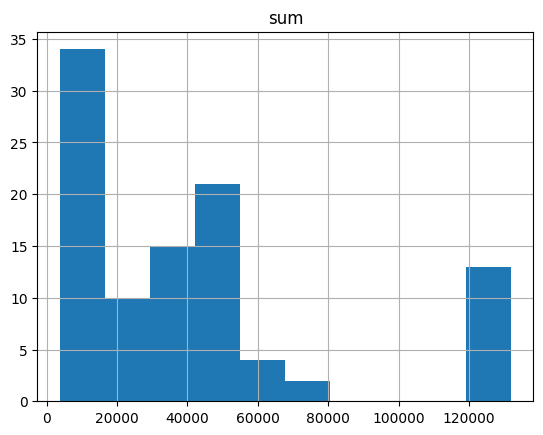

In [13]:
df[['sum']].hist()

In [14]:
dd = df\
.groupby(['parking_type'], dropna = False)\
.agg(['count','mean'])

dd

receipt_date                                 sum  \
                              count                          mean count   
parking_type                                                              
hozyaystvennoe_vedenie           62 2020-06-22 12:23:13.548387072    62   
narodnyy_garazh                  37 2020-05-27 14:55:08.108108032    37   

                                     client_id            invoice_date_month  \
                                mean     count       mean              count   
parking_type                                                                   
hozyaystvennoe_vedenie  22926.586484        62  52.580645                 62   
narodnyy_garazh         75476.367568        37  43.000000                 37   

                                                      
                                                mean  
parking_type                                          
hozyaystvennoe_vedenie 2020-05-24 00:46:27.096774144  
narodnyy_garazh        2020-04-28 03:14:35.675675648

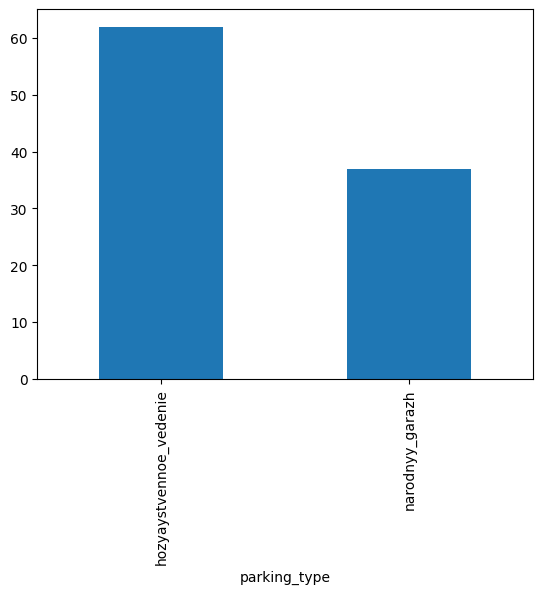

In [15]:
dd['sum']['count'].plot(kind = 'bar')

In [16]:
!pip3 install pandas-profiling==2.11

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 243 kB 5.1 MB/s 
     |████████████████████████████████| 690 kB 71.6 MB/s 
     |████████████████████████████████| 4.7 MB 58.3 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
     |████████████████████████████████| 75 kB 4.5 MB/s 
     |████████████████████████████████| 296 kB 61.2 MB/s 
     |████████████████████████████████| 1.6 MB 72.8 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=d6824796867f5a7c0ebdcaacd56a88d8ab164b2c8a733697171a8f7c14bcbc53
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
Successfully built htmlmin
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: pandas-profiling
    Found

In [17]:
from pandas_profiling import ProfileReport

In [18]:
profile = ProfileReport(df, title = 'Pandas Profiling Report')
profile

Summarize dataset:   0%|          | 0/19 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [19]:
profile.to_file("report_df.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [20]:
# Промежуточный вывод
# произведен разведывательный анализ полученных данных, сохранены файлы с отчетами

# Больще данных по ссылке
https://drive.google.com/drive/folders/1PAFyDrluG6aJMlo1KVpgTxkue6DcgQ5v?usp=sharing

#Отчет на сырых данных

In [ ]:
df = df.groupby(['client','parking_type','invoice_date_month'])['sum']\
.agg(['count', 'sum']).reset_index()\
.sort_values(['invoice_date_month'],ascending = False)
df['client_id'] = np.arange(len(df))
df

,client,parking_type,invoice_date_month,count,sum,client_id
36,Клиент 2,hozyaystvennoe_vedenie,2021-07-01,1,14565.60,0
86,Клиент 6,hozyaystvennoe_vedenie,2021-07-01,1,48552.00,1
73,Клиент 5,narodnyy_garazh,2021-07-01,1,131880.00,2
35,Клиент 2,hozyaystvennoe_vedenie,2021-06-01,1,14565.60,3
85,Клиент 6,hozyaystvennoe_vedenie,2021-06-01,1,48552.00,4
...,...,...,...,...,...,...
0,Клиент 1,narodnyy_garazh,2019-07-01,1,20711.04,94
87,Клиент 7,hozyaystvennoe_vedenie,2019-07-01,1,3744.00,95
37,Клиент 3,hozyaystvennoe_vedenie,2019-07-01,1,18720.00,96
12,Клиент 2,hozyaystvennoe_vedenie,2019-07-01,1,8736.00,97


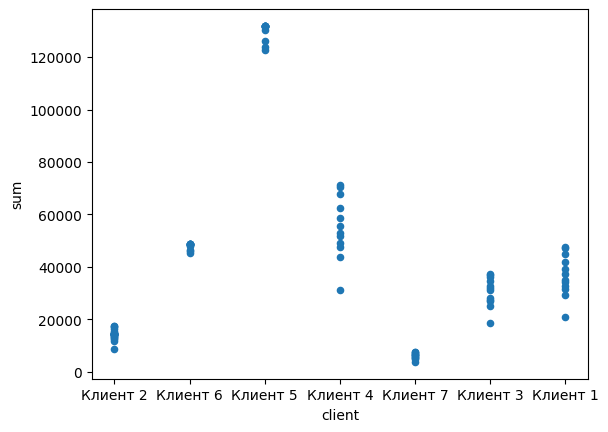

In [ ]:
df.plot(x = 'client', y = 'sum', kind = 'scatter') #, grid = True сетка

In [ ]:
# Пердположим, что сумма полученная от каждого клиента - сильно отличается

In [ ]:
t = df.groupby(['client','invoice_date_month']).agg(['sum'])['sum'].reset_index()\
.sort_values(['sum'],ascending = False)
t

,client,invoice_date_month,sum
68,Клиент 5,2021-02-01,131880.00
73,Клиент 5,2021-07-01,131880.00
69,Клиент 5,2021-03-01,131880.00
70,Клиент 5,2021-04-01,131880.00
71,Клиент 5,2021-05-01,131880.00
...,...,...,...
91,Клиент 7,2019-11-01,5647.20
90,Клиент 7,2019-10-01,5470.14
89,Клиент 7,2019-09-01,5364.06
88,Клиент 7,2019-08-01,4976.40


In [ ]:
# По сумме полученных средств видно сильное расслоение на разные группы

In [ ]:
client = np.array(t['client'].str[-1])
client = client.astype(int)
client

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 4, 1, 6, 6, 6, 1, 4, 1, 1, 3, 1,
       3, 3, 1, 3, 1, 3, 1, 3, 1, 4, 3, 1, 3, 3, 3, 3, 1, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7])

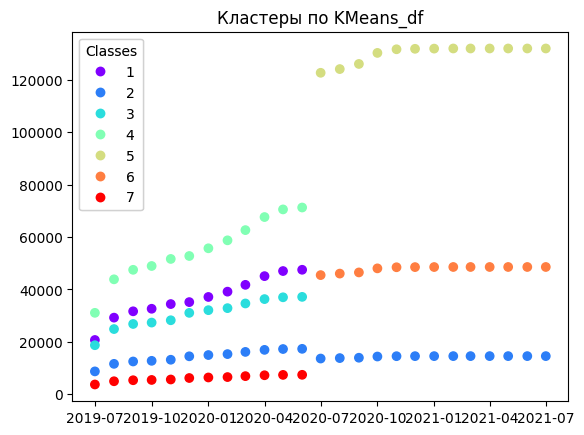

In [ ]:
fig, axes = plt.subplots()

scatter0 = axes.scatter(t['invoice_date_month'],t['sum'], c=client, cmap='rainbow')
axes.set_title("Кластеры по KMeans_df")
legend0 = axes.legend(*scatter0.legend_elements(), title="Classes")
axes.add_artist(legend0)

plt.show()

In [ ]:
#Клиент №5 овыбивается из "общего" значения экстремальными значениями

####Заготовка под даты

In [ ]:
#Выполняем аналитическую таблицу по данным по клиентам

In [ ]:
min_dt = df['invoice_date_month'].min()
max_dt = df['invoice_date_month'].max()

min_dt
max_dt

Timestamp('2021-07-01 00:00:00')

In [ ]:
dt = pd.DataFrame(pd.date_range(min_dt,max_dt,freq='MS'))
dt.columns = ['month']

dt.head()

,month
0,2019-07-01
1,2019-08-01
2,2019-09-01
3,2019-10-01
4,2019-11-01


In [ ]:
dt.merge(df, how = 'left', left_on = 'month', right_on = 'invoice_date_month' )

,month,client,parking_type,invoice_date_month,count,sum,client_id
0,2019-07-01,Клиент 1,narodnyy_garazh,2019-07-01,1,20711.04,94
1,2019-07-01,Клиент 7,hozyaystvennoe_vedenie,2019-07-01,1,3744.00,95
2,2019-07-01,Клиент 3,hozyaystvennoe_vedenie,2019-07-01,1,18720.00,96
3,2019-07-01,Клиент 2,hozyaystvennoe_vedenie,2019-07-01,1,8736.00,97
4,2019-07-01,Клиент 4,narodnyy_garazh,2019-07-01,1,31066.56,98
...,...,...,...,...,...,...,...
94,2021-06-01,Клиент 6,hozyaystvennoe_vedenie,2021-06-01,1,48552.00,4
95,2021-06-01,Клиент 5,narodnyy_garazh,2021-06-01,1,131880.00,5
96,2021-07-01,Клиент 2,hozyaystvennoe_vedenie,2021-07-01,1,14565.60,0
97,2021-07-01,Клиент 6,hozyaystvennoe_vedenie,2021-07-01,1,48552.00,1


####Таблица с юзерами

In [ ]:
df.head()

,client,parking_type,invoice_date_month,count,sum,client_id
36,Клиент 2,hozyaystvennoe_vedenie,2021-07-01,1,14565.6,0
86,Клиент 6,hozyaystvennoe_vedenie,2021-07-01,1,48552.0,1
73,Клиент 5,narodnyy_garazh,2021-07-01,1,131880.0,2
35,Клиент 2,hozyaystvennoe_vedenie,2021-06-01,1,14565.6,3
85,Клиент 6,hozyaystvennoe_vedenie,2021-06-01,1,48552.0,4


In [ ]:
users = df.groupby('client')[['invoice_date_month']].min().reset_index()
users.columns = ['client','reg_month']
users#.head()

,client,reg_month
0,Клиент 1,2019-07-01
1,Клиент 2,2019-07-01
2,Клиент 3,2019-07-01
3,Клиент 4,2019-07-01
4,Клиент 5,2020-07-01
5,Клиент 6,2020-07-01
6,Клиент 7,2019-07-01


In [ ]:
min_dt = df['invoice_date_month'].min()
max_dt = df['invoice_date_month'].max()

min_dt
max_dt

Timestamp('2021-07-01 00:00:00')

In [ ]:
dt = pd.DataFrame(pd.date_range(min_dt,max_dt,freq='MS'))
dt.columns = ['month']
dt['key'] = 1
dt

,month,key
0,2019-07-01,1
1,2019-08-01,1
2,2019-09-01,1
3,2019-10-01,1
4,2019-11-01,1
5,2019-12-01,1
6,2020-01-01,1
7,2020-02-01,1
8,2020-03-01,1
9,2020-04-01,1


In [ ]:
users['key'] = 1

users

,client,reg_month,key
0,Клиент 1,2019-07-01,1
1,Клиент 2,2019-07-01,1
2,Клиент 3,2019-07-01,1
3,Клиент 4,2019-07-01,1
4,Клиент 5,2020-07-01,1
5,Клиент 6,2020-07-01,1
6,Клиент 7,2019-07-01,1


In [ ]:
user_month = df.groupby(['client','invoice_date_month'])['sum'].sum().reset_index()
user_month

,client,invoice_date_month,sum
0,Клиент 1,2019-07-01,20711.040
1,Клиент 1,2019-08-01,29233.440
2,Клиент 1,2019-09-01,31648.656
3,Клиент 1,2019-10-01,32619.888
4,Клиент 1,2019-11-01,34411.200
...,...,...,...
94,Клиент 7,2020-02-01,6571.500
95,Клиент 7,2020-03-01,6927.720
96,Клиент 7,2020-04-01,7261.560
97,Клиент 7,2020-05-01,7399.224


In [ ]:
user_month.columns = ['client', 'month', 'sum']
user_month

,client,month,sum
0,Клиент 1,2019-07-01,20711.040
1,Клиент 1,2019-08-01,29233.440
2,Клиент 1,2019-09-01,31648.656
3,Клиент 1,2019-10-01,32619.888
4,Клиент 1,2019-11-01,34411.200
...,...,...,...
94,Клиент 7,2020-02-01,6571.500
95,Клиент 7,2020-03-01,6927.720
96,Клиент 7,2020-04-01,7261.560
97,Клиент 7,2020-05-01,7399.224


#Создаем аналитическую таблицу

In [ ]:
template = df[['client','invoice_date_month']].copy()

template.columns = ['client','month']

In [ ]:
at = template.merge(user_month,how='left',on=['client','month'])
at['sum'] = at['sum'].fillna(0)
at.head()

,client,month,sum
0,Клиент 2,2021-07-01,14565.6
1,Клиент 6,2021-07-01,48552.0
2,Клиент 5,2021-07-01,131880.0
3,Клиент 2,2021-06-01,14565.6
4,Клиент 6,2021-06-01,48552.0


In [ ]:
df['sum'].sum() - at['sum'].sum()

0.0

In [ ]:
df['sum'].sum()

4214073.961999999

####Считаем метрики

In [ ]:
at.groupby('month')['sum'].sum().reset_index().sort_values('month')

,month,sum
0,2019-07-01,82977.600
1,2019-08-01,114553.600
2,2019-09-01,123822.140
3,2019-10-01,127134.220
4,2019-11-01,133088.000
5,2019-12-01,139654.320
6,2020-01-01,146266.680
7,2020-02-01,152625.380
8,2020-03-01,162089.120
9,2020-04-01,173171.400


In [ ]:
at['user'] = 1 # Добавляем константный столбец и при группировке получим количество пользователей в месяц

at

,client,month,sum,user
0,Клиент 2,2021-07-01,14565.60,1
1,Клиент 6,2021-07-01,48552.00,1
2,Клиент 5,2021-07-01,131880.00,1
3,Клиент 2,2021-06-01,14565.60,1
4,Клиент 6,2021-06-01,48552.00,1
...,...,...,...,...
94,Клиент 1,2019-07-01,20711.04,1
95,Клиент 7,2019-07-01,3744.00,1
96,Клиент 3,2019-07-01,18720.00,1
97,Клиент 2,2019-07-01,8736.00,1


In [ ]:
# Сколько зарегистрированных пользователей было в месц? пожуйлиса ответ :
at.groupby('month')[['user','sum']].sum().reset_index().sort_values('month')
# Пользователи регистритуются группами

,month,user,sum
0,2019-07-01,5,82977.600
1,2019-08-01,5,114553.600
2,2019-09-01,5,123822.140
3,2019-10-01,5,127134.220
4,2019-11-01,5,133088.000
5,2019-12-01,5,139654.320
6,2020-01-01,5,146266.680
7,2020-02-01,5,152625.380
8,2020-03-01,5,162089.120
9,2020-04-01,5,173171.400


In [ ]:
at['active'] = (~at['sum'].isna())*1# Добавляем столбец с 1- были покупки в этом месяце 0- не было

at.head()

,client,month,sum,user,active
0,Клиент 2,2021-07-01,14565.6,1,1
1,Клиент 6,2021-07-01,48552.0,1,1
2,Клиент 5,2021-07-01,131880.0,1,1
3,Клиент 2,2021-06-01,14565.6,1,1
4,Клиент 6,2021-06-01,48552.0,1,1


In [ ]:
# Сколько активных пользователей было в месц? пожуйлиса ответ :
at.groupby('month')[['user','active','sum']].sum().reset_index().sort_values('month')

,month,user,active,sum
0,2019-07-01,5,5,82977.600
1,2019-08-01,5,5,114553.600
2,2019-09-01,5,5,123822.140
3,2019-10-01,5,5,127134.220
4,2019-11-01,5,5,133088.000
5,2019-12-01,5,5,139654.320
6,2020-01-01,5,5,146266.680
7,2020-02-01,5,5,152625.380
8,2020-03-01,5,5,162089.120
9,2020-04-01,5,5,173171.400


In [ ]:
# Сколько новых пользователей было в месц? пожуйлиса ответ :
at['new'] = (at['month'] == at['month'])*1 # В этом месяце пользователь только зарегистрировался

at.groupby('month')[['user','active','new','sum']]\
 .sum().reset_index()\
 .sort_values('month')

,month,user,active,new,sum
0,2019-07-01,5,5,5,82977.600
1,2019-08-01,5,5,5,114553.600
2,2019-09-01,5,5,5,123822.140
3,2019-10-01,5,5,5,127134.220
4,2019-11-01,5,5,5,133088.000
5,2019-12-01,5,5,5,139654.320
6,2020-01-01,5,5,5,146266.680
7,2020-02-01,5,5,5,152625.380
8,2020-03-01,5,5,5,162089.120
9,2020-04-01,5,5,5,173171.400


In [ ]:
# Сколько пользователь заплатил за месяц? пожуйлиса ответ :
t = at.groupby(['client','month'])[['sum']]\
 .sum().reset_index()\
 .sort_values('month')
t

,client,month,sum
0,Клиент 1,2019-07-01,20711.04
87,Клиент 7,2019-07-01,3744.00
37,Клиент 3,2019-07-01,18720.00
12,Клиент 2,2019-07-01,8736.00
49,Клиент 4,2019-07-01,31066.56
...,...,...,...
72,Клиент 5,2021-06-01,131880.00
35,Клиент 2,2021-06-01,14565.60
86,Клиент 6,2021-07-01,48552.00
73,Клиент 5,2021-07-01,131880.00


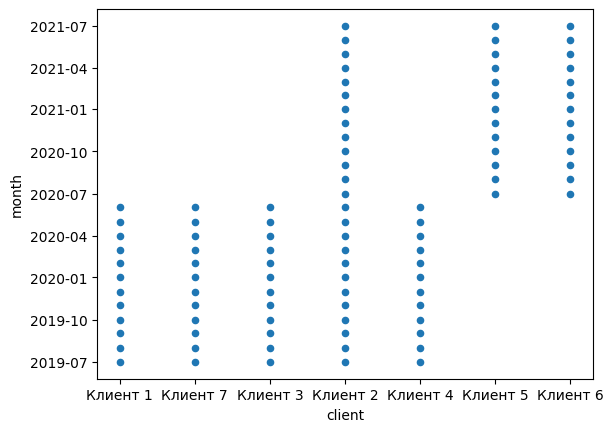

In [ ]:
t.plot(x = 'client', y = 'month', kind = 'scatter')

#####Предварительные вывод

*   В данных наблюдается сильные аномалии
*   В данных наблюдается сильное разделение клиета 5 и остальное группы
*   В ходе дальнейшего исследования не будут анализироваться полученные метрики как не информативные
*   Получение информативных метрик затруднено в связи с характером входных данных

#KMeans кластеризация

In [ ]:
# Выясняем на сколько разрозненные данные получены из выгрузки
# Если есть аномалии и большая разница в платежех клиентов KMeans - должен ее почувствовать

In [ ]:
from scipy.spatial.distance import cdist
from scipy.cluster.vq import kmeans

from sklearn.cluster import KMeans

In [ ]:
df.head()

,client,parking_type,invoice_date_month,count,sum,client_id
36,Клиент 2,hozyaystvennoe_vedenie,2021-07-01,1,14565.6,0
86,Клиент 6,hozyaystvennoe_vedenie,2021-07-01,1,48552.0,1
73,Клиент 5,narodnyy_garazh,2021-07-01,1,131880.0,2
35,Клиент 2,hozyaystvennoe_vedenie,2021-06-01,1,14565.6,3
85,Клиент 6,hozyaystvennoe_vedenie,2021-06-01,1,48552.0,4


In [ ]:
KMeans_df = df.copy()
KMeans_df_hoz = df.query('parking_type == "hozyaystvennoe_vedenie"').copy()
KMeans_df_nar = df.query('parking_type == "narodnyy_garazh"').copy()
KMeans_df.head()

,client,parking_type,invoice_date_month,count,sum,client_id
36,Клиент 2,hozyaystvennoe_vedenie,2021-07-01,1,14565.6,0
86,Клиент 6,hozyaystvennoe_vedenie,2021-07-01,1,48552.0,1
73,Клиент 5,narodnyy_garazh,2021-07-01,1,131880.0,2
35,Клиент 2,hozyaystvennoe_vedenie,2021-06-01,1,14565.6,3
85,Клиент 6,hozyaystvennoe_vedenie,2021-06-01,1,48552.0,4


In [ ]:
KMeans_df['client_dist'] = [random.random()/2 for i in range(len(KMeans_df))]
KMeans_df_hoz['client_dist'] = [random.random()/2 for i in range(len(KMeans_df_hoz))]
KMeans_df_nar['client_dist'] = [random.random()/2 for i in range(len(KMeans_df_nar))]
KMeans_df.columns

Index(['client', 'parking_type', 'invoice_date_month', 'count', 'sum',
       'client_id', 'client_dist'],
      dtype='object')

In [ ]:
X = np.array(KMeans_df[['sum', 'client_dist']])
X[:5]

array([[1.45656000e+04, 3.25567407e-01],
       [4.85520000e+04, 1.25591695e-01],
       [1.31880000e+05, 2.55382199e-01],
       [1.45656000e+04, 3.53683209e-02],
       [4.85520000e+04, 1.74781872e-01]])

In [ ]:
X_hoz = np.array(KMeans_df_hoz[['sum', 'client_dist']])
X_hoz[:5]

array([[1.45656000e+04, 1.88350063e-01],
       [4.85520000e+04, 2.39293396e-01],
       [1.45656000e+04, 2.95764984e-01],
       [4.85520000e+04, 4.15555405e-01],
       [1.45656000e+04, 2.00171536e-01]])

In [ ]:
X_nar = np.array(KMeans_df_nar[['sum', 'client_dist']])
X_nar[:5]

array([[1.31880000e+05, 3.38335874e-01],
       [1.31880000e+05, 2.20197278e-01],
       [1.31880000e+05, 4.60379703e-02],
       [1.31880000e+05, 1.93110307e-01],
       [1.31880000e+05, 1.75728524e-01]])

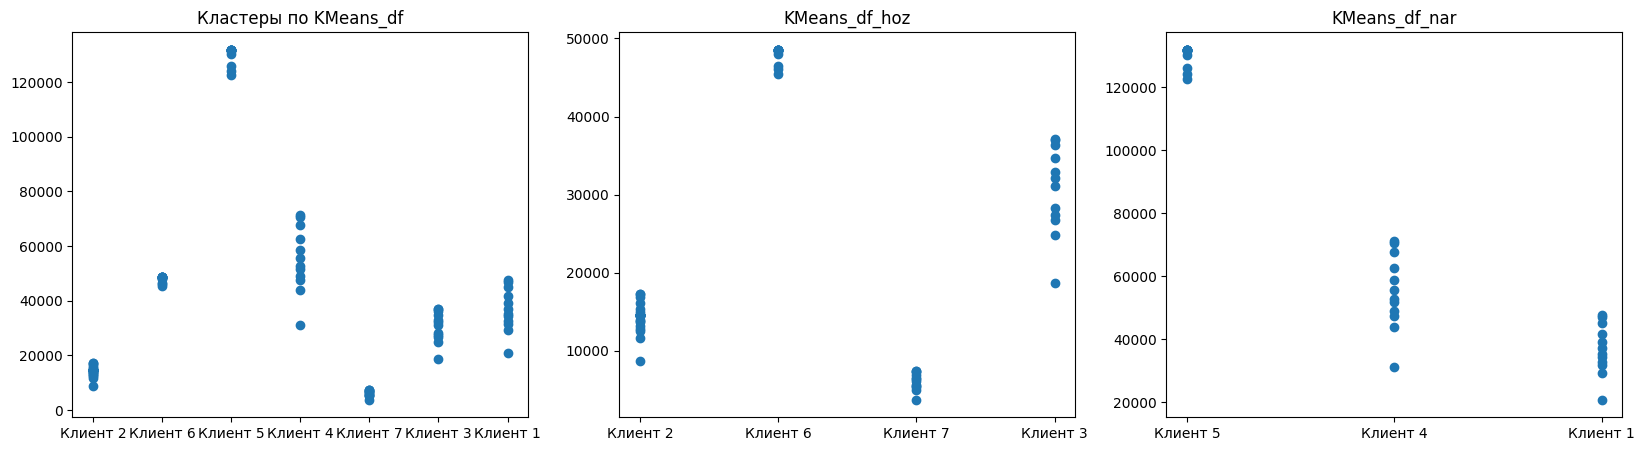

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

axes[0].scatter(x = KMeans_df['client'], y = KMeans_df['sum'], label='True Position')
axes[0].set_title("Кластеры по KMeans_df")

axes[1].scatter(x = KMeans_df_hoz['client'], y = KMeans_df_hoz['sum'], label='True Position')
axes[1].set_title("KMeans_df_hoz")

axes[2].scatter(x = KMeans_df_nar['client'], y = KMeans_df_nar['sum'], label='True Position')
axes[2].set_title("KMeans_df_nar");

plt.show()

In [ ]:
kmeanss = KMeans(n_clusters=3, random_state=0).fit(X)
kmeanss.labels_

array([1, 0, 2, 1, 0, 2, 1, 2, 0, 2, 1, 0, 0, 1, 2, 0, 1, 2, 1, 2, 0, 2,
       0, 1, 2, 0, 1, 2, 1, 0, 0, 2, 1, 1, 2, 0, 0, 1, 2, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int32)

In [ ]:
kmeanss_hoz = KMeans(n_clusters=3, random_state=0).fit(X_hoz)
kmeanss_hoz.labels_

array([0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0], dtype=int32)

In [ ]:
kmeanss_nar = KMeans(n_clusters=2, random_state=0).fit(X_nar)
kmeanss_nar.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
kmeanss.cluster_centers_

array([[4.56501205e+04, 2.38922090e-01],
       [1.38072569e+04, 2.49343635e-01],
       [1.29942277e+05, 3.21229391e-01]])

In [ ]:
kmeanss_hoz.cluster_centers_

array([[1.18496269e+04, 2.73133570e-01],
       [4.79068262e+04, 2.25181343e-01],
       [3.16703455e+04, 3.13993653e-01]])

In [ ]:
kmeanss_nar.cluster_centers_

array([[1.29942277e+05, 2.20495391e-01],
       [4.59740000e+04, 1.97325329e-01]])

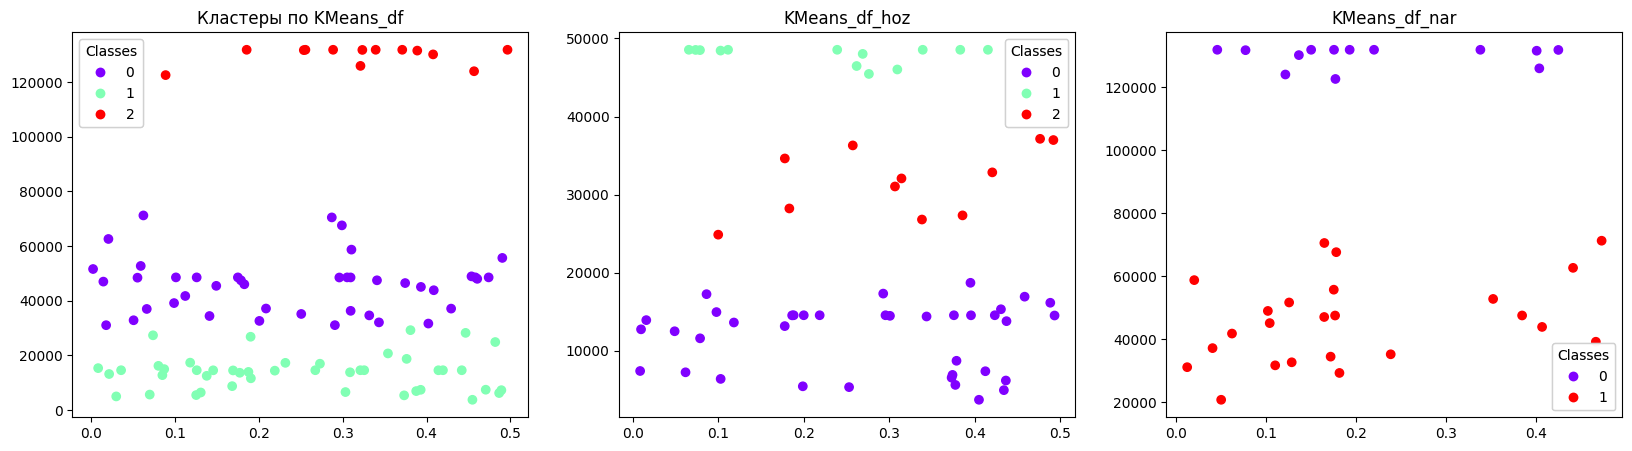

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

scatter0 = axes[0].scatter(x = X[:,1], y = X[:,0], c=kmeanss.labels_, cmap='rainbow')
axes[0].set_title("Кластеры по KMeans_df")
legend0 = axes[0].legend(*scatter0.legend_elements(), title="Classes")


scatter1 = axes[1].scatter(x = X_hoz[:,1], y = X_hoz[:,0], c=kmeanss_hoz.labels_, cmap='rainbow')
axes[1].set_title("KMeans_df_hoz")
legend1 = axes[1].legend(*scatter1.legend_elements(), title="Classes")


scatter2 = axes[2].scatter(x = X_nar[:,1], y = X_nar[:,0], c=kmeanss_nar.labels_, cmap='rainbow')
axes[2].set_title("KMeans_df_nar")
legend2 = axes[2].legend(*scatter2.legend_elements(), title="Classes")

axes[0].add_artist(legend0)
axes[1].add_artist(legend1)
axes[2].add_artist(legend2)


plt.show()

In [ ]:
# Список найденных центроидов и дисперсия
centroids, disp = kmeans(X_nar, 5)
disp

2557.993330091243

In [ ]:
# Перебираем найденные центроиды, метод <kmeans> всегда возвратит двумерный массив
# оба параметра метода <cdist> должны быть двумерными массивами
results = ( sum(cdist(X_nar, [centroid,])**2) for centroid in centroids )
list(list(results)[0])[0]

132674866022.26218

In [ ]:
tt1 = []
tt2 = []
tt1_nar = []
tt2_nar = []
tt1_hoz = []
tt2_hoz = []

for i in range(7-1):
  nn = i+2
  columms = f'k{nn}'
  kmeanss = KMeans(n_clusters=nn, random_state=0).fit(X)
  KMeans_df[columms] = kmeanss.labels_
  centers = kmeanss.cluster_centers_
  results = ( sum(cdist(X, [centers,])**2) for centers in centers )
  clasterr_error =  list(list(results)[0])[0]
  tt1.append(nn)
  tt2.append(clasterr_error)

  kmeanss_hoz = KMeans(n_clusters=nn, random_state=20).fit(X_hoz)
  KMeans_df_hoz[columms] = kmeanss_hoz.labels_
  centers_hoz = kmeanss_nar.cluster_centers_
  results_hoz = ( sum(cdist(X_hoz, [centers,])**2) for centers in centers_hoz )
  clasterr_error_hoz =  list(list(results_hoz)[0])[0]
  tt1_hoz.append(nn)
  tt2_hoz.append(clasterr_error_hoz)

  kmeanss_nar = KMeans(n_clusters=nn, random_state=42).fit(X_nar)
  KMeans_df_nar[columms] = kmeanss_nar.labels_
  centers_nar = kmeanss_nar.cluster_centers_
  results_nar = ( sum(cdist(X_nar, [centers,])**2) for centers in centers_nar )
  clasterr_error_nar =  list(list(results_nar)[0])[0]
  tt1_nar.append(nn)
  tt2_nar.append(clasterr_error_nar)

tt1

[2, 3, 4, 5, 6, 7]

In [ ]:
tt2

[898161439817.7959,
 143283081770.85794,
 151352425198.7983,
 197329261355.96054,
 197329261355.96054,
 145598061412.89877]

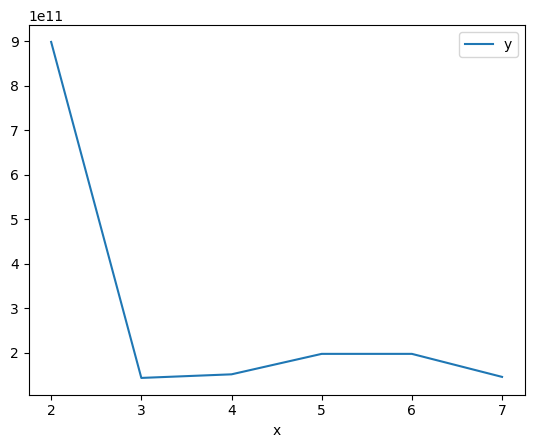

In [ ]:
t = pd.DataFrame({'x':tt1,'y':tt2})
t.plot(x='x',y='y',kind='line')
#Сильное падение произошло при переходе от 2 к 3 кластерам

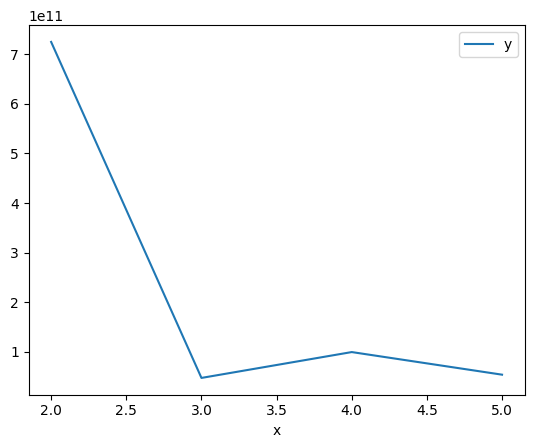

In [ ]:
t = pd.DataFrame({'x':tt1_hoz[:4],'y':tt2_hoz[:4]})
t.plot(x='x',y='y',kind='line')
#Сильное падение произошло при переходе от 2 к 3 кластерам

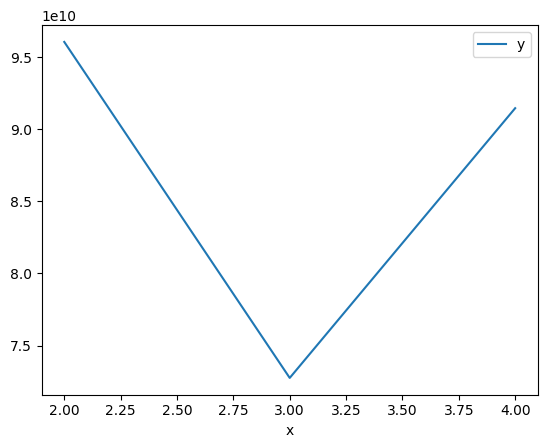

In [ ]:
t = pd.DataFrame({'x':tt1_nar[:3],'y':tt2_nar[:3]})
t.plot(x='x',y='y',kind='line')
#Результаты слоожно интерпретировать - данные разрознены

####Визуализация кластеров_Выводы

In [ ]:
KMeans_df = df.copy()
KMeans_df_hoz = df.query('parking_type == "hozyaystvennoe_vedenie"').copy()
KMeans_df_nar = df.query('parking_type == "narodnyy_garazh"').copy()
KMeans_df.head()

,client,parking_type,invoice_date_month,count,sum,client_id
36,Клиент 2,hozyaystvennoe_vedenie,2021-07-01,1,14565.6,0
86,Клиент 6,hozyaystvennoe_vedenie,2021-07-01,1,48552.0,1
73,Клиент 5,narodnyy_garazh,2021-07-01,1,131880.0,2
35,Клиент 2,hozyaystvennoe_vedenie,2021-06-01,1,14565.6,3
85,Клиент 6,hozyaystvennoe_vedenie,2021-06-01,1,48552.0,4


In [ ]:
KMeans_df['client_dist'] = [random.random()/2 for i in range(len(KMeans_df))]
KMeans_df_hoz['client_dist'] = [random.random()/2 for i in range(len(KMeans_df_hoz))]
KMeans_df_nar['client_dist'] = [random.random()/2 for i in range(len(KMeans_df_nar))]
KMeans_df.columns

Index(['client', 'parking_type', 'invoice_date_month', 'count', 'sum',
       'client_id', 'client_dist'],
      dtype='object')

In [ ]:
X = np.array(KMeans_df[['sum', 'client_dist']])
X[:5]

array([[1.45656000e+04, 6.94152904e-02],
       [4.85520000e+04, 3.73780589e-01],
       [1.31880000e+05, 4.28412609e-01],
       [1.45656000e+04, 7.96033165e-03],
       [4.85520000e+04, 5.65909796e-02]])

In [ ]:
X_hoz = np.array(KMeans_df_hoz[['sum', 'client_dist']])
X_hoz[:5]

array([[1.45656000e+04, 3.35179268e-01],
       [4.85520000e+04, 2.97274506e-01],
       [1.45656000e+04, 3.39043535e-01],
       [4.85520000e+04, 2.63369636e-01],
       [1.45656000e+04, 2.57482999e-01]])

In [ ]:
X_nar = np.array(KMeans_df_nar[['sum', 'client_dist']])
X_nar[:5]

array([[1.31880000e+05, 1.41738585e-01],
       [1.31880000e+05, 4.55568883e-01],
       [1.31880000e+05, 1.27415516e-01],
       [1.31880000e+05, 3.31515163e-01],
       [1.31880000e+05, 1.07367484e-01]])

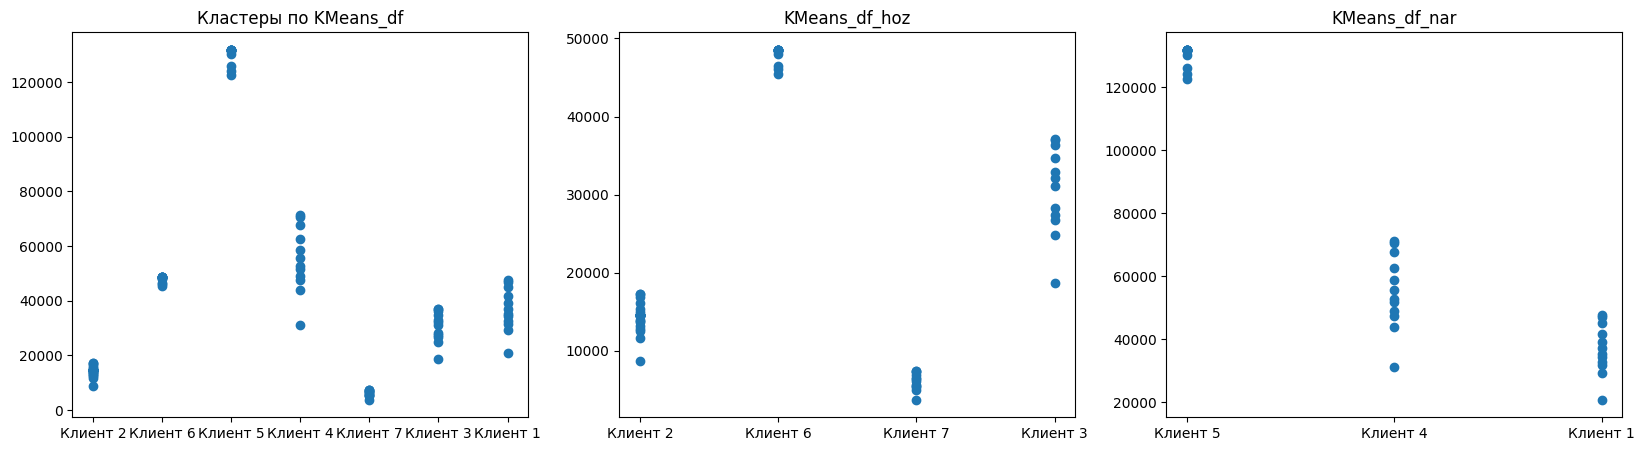

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

axes[0].scatter(x = KMeans_df['client'], y = KMeans_df['sum'], label='True Position')
axes[0].set_title("Кластеры по KMeans_df")

axes[1].scatter(x = KMeans_df_hoz['client'], y = KMeans_df_hoz['sum'], label='True Position')
axes[1].set_title("KMeans_df_hoz")

axes[2].scatter(x = KMeans_df_nar['client'], y = KMeans_df_nar['sum'], label='True Position')
axes[2].set_title("KMeans_df_nar");

plt.show()

In [ ]:
kmeanss = KMeans(n_clusters=3, random_state=0).fit(X)
kmeanss_hoz = KMeans(n_clusters=3, random_state=0).fit(X_hoz)
kmeanss_nar = KMeans(n_clusters=2, random_state=0).fit(X_nar)

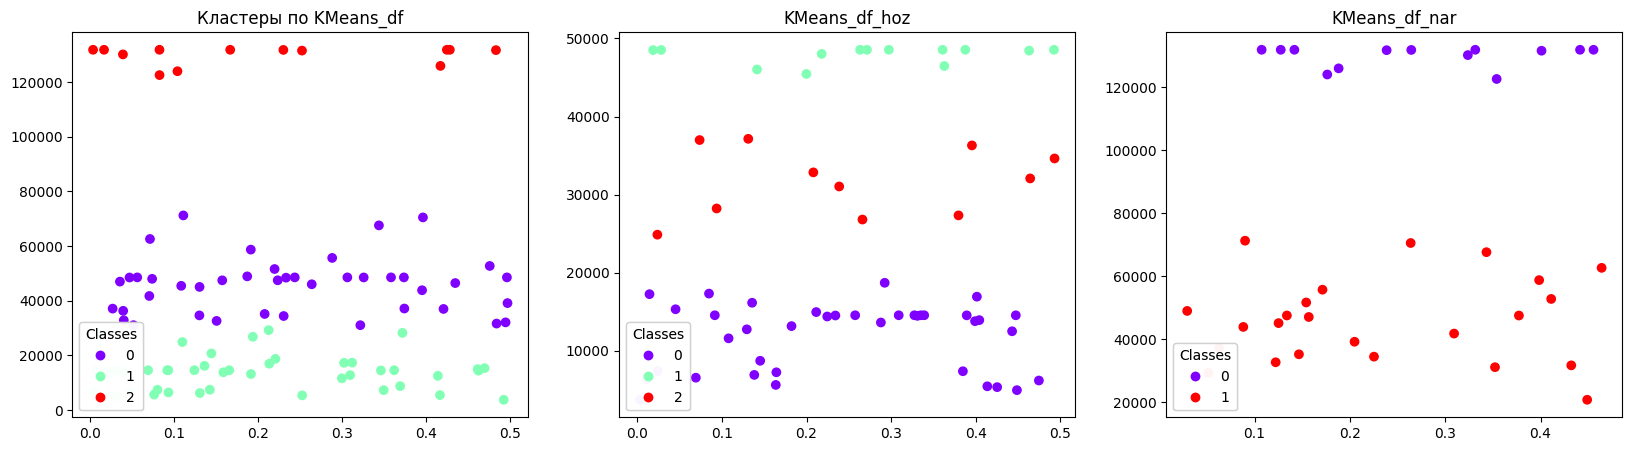

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

scatter0 = axes[0].scatter(x = X[:,1], y = X[:,0], c=kmeanss.labels_, cmap='rainbow')
axes[0].set_title("Кластеры по KMeans_df")
legend0 = axes[0].legend(*scatter0.legend_elements(),
                    loc="lower left", title="Classes")


scatter1 = axes[1].scatter(x = X_hoz[:,1], y = X_hoz[:,0], c=kmeanss_hoz.labels_, cmap='rainbow')
axes[1].set_title("KMeans_df_hoz")
legend1 = axes[1].legend(*scatter1.legend_elements(),
                    loc="lower left", title="Classes")


scatter2 = axes[2].scatter(x = X_nar[:,1], y = X_nar[:,0], c=kmeanss_nar.labels_, cmap='rainbow')
axes[2].set_title("KMeans_df_nar")
legend2 = axes[2].legend(*scatter2.legend_elements(),
                    loc="lower left", title="Classes")

axes[0].add_artist(legend0)
axes[1].add_artist(legend1)
axes[2].add_artist(legend2)


plt.show()

In [ ]:
KMeans_df['k3'] = kmeanss.labels_
KMeans_df_hoz['k3'] = kmeanss_hoz.labels_
KMeans_df_nar['k2'] = kmeanss_nar.labels_

In [ ]:
KMeans_df.head()

,client,parking_type,invoice_date_month,count,sum,client_id,client_dist,k3
36,Клиент 2,hozyaystvennoe_vedenie,2021-07-01,1,14565.6,0,0.069415,1
86,Клиент 6,hozyaystvennoe_vedenie,2021-07-01,1,48552.0,1,0.373781,0
73,Клиент 5,narodnyy_garazh,2021-07-01,1,131880.0,2,0.428413,2
35,Клиент 2,hozyaystvennoe_vedenie,2021-06-01,1,14565.6,3,0.007960,1
85,Клиент 6,hozyaystvennoe_vedenie,2021-06-01,1,48552.0,4,0.056591,0


In [ ]:
KMeans_df.sort_values(['sum'])\
.groupby(['client','parking_type','k3'])\
.agg({'sum':'count'})

sum
client   parking_type           k3     
Клиент 1 narodnyy_garazh        0    10
                                1     2
Клиент 2 hozyaystvennoe_vedenie 1    25
Клиент 3 hozyaystvennoe_vedenie 0     7
                                1     5
Клиент 4 narodnyy_garazh        0    12
Клиент 5 narodnyy_garazh        2    13
Клиент 6 hozyaystvennoe_vedenie 0    13
Клиент 7 hozyaystvennoe_vedenie 1    12

#####Предварительные вывод

*   В данных обнаружены сильны аномалии и подтверждены работой алгоритма K-средних
*   При анализе работы алгоритма K-средних наблюдается разделение клиета 5 и остальное группы
*   При анализе работы алгоритма K-средних наблюдается разделение клиентов по признаку "parking_type"   

#Запуск Кэтбуста

#Предположена возможность получения предсказания на следующий год поведения клиентов

####Обучающая и тестовая выборка (train and test)

In [ ]:
df.head()

,client,parking_type,invoice_date_month,count,sum,client_id
36,Клиент 2,hozyaystvennoe_vedenie,2021-07-01,1,14565.6,0
86,Клиент 6,hozyaystvennoe_vedenie,2021-07-01,1,48552.0,1
73,Клиент 5,narodnyy_garazh,2021-07-01,1,131880.0,2
35,Клиент 2,hozyaystvennoe_vedenie,2021-06-01,1,14565.6,3
85,Клиент 6,hozyaystvennoe_vedenie,2021-06-01,1,48552.0,4


In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df,train_size=0.7,random_state=42)

In [ ]:
val, test = train_test_split(test,train_size=0.5,random_state=42)

In [ ]:
print(f'''len(df)= { len(df)}
      len(train)= { len(train)}
      len(test)= { len(test)}
      len(val)= { len(val)}''')

len(df)= 99
      len(train)= 69
      len(test)= 15
      len(val)= 15


In [ ]:
df.describe()

,count,sum,client_id
count,99.0,99.000000,99.000000
mean,1.0,42566.403657,49.000000
std,0.0,38111.230887,28.722813
min,1.0,3744.000000,0.000000
25%,1.0,14562.744000,24.500000
50%,1.0,32857.500000,49.000000
75%,1.0,48552.000000,73.500000
max,1.0,131880.000000,98.000000


In [ ]:
train.describe()

,count,sum,client_id
count,69.0,69.000000,69.000000
mean,1.0,45712.793217,50.376812
std,0.0,40453.448454,28.491021
min,1.0,4976.400000,1.000000
25%,1.0,14565.600000,27.000000
50%,1.0,34638.600000,52.000000
75%,1.0,48929.832000,75.000000
max,1.0,131880.000000,98.000000


In [ ]:
test.describe()

,count,sum,client_id
count,15.0,15.000000,15.000000
mean,1.0,31647.391733,39.066667
std,0.0,19605.566411,33.003174
min,1.0,7399.224000,0.000000
25%,1.0,14549.892000,11.500000
50%,1.0,28236.000000,26.000000
75%,1.0,48552.000000,69.000000
max,1.0,71232.768000,97.000000


In [ ]:
val.describe()

,count,sum,client_id
count,15.0,15.000000,15.000000
mean,1.0,39012.023600,52.600000
std,0.0,40548.615342,24.781329
min,1.0,3744.000000,9.000000
25%,1.0,10619.685000,36.500000
50%,1.0,32081.400000,49.000000
75%,1.0,37135.326000,69.000000
max,1.0,131880.000000,95.000000


In [ ]:
df.columns

Index(['client', 'parking_type', 'invoice_date_month', 'count', 'sum',
       'client_id'],
      dtype='object')

####Список фичей

In [ ]:
X = ['client', 'parking_type', 'invoice_date_month']

cat_features = ['client', 'parking_type']
y = ['sum']

####Обучение модели

In [ ]:
! pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from catboost import CatBoostRegressor

In [ ]:
X = ['client', 'parking_type', 'invoice_date_month']

cat_features = ['client', 'parking_type']
y = ['sum']

In [ ]:
parameters = {'cat_features': cat_features,
              'eval_metric': 'MAPE',
              'learning_rate': 0.055,
              'random_seed':42,
              'verbose':100}

In [ ]:
model = CatBoostRegressor(**parameters)

In [ ]:
model.fit(train[X],train[y],eval_set=(val[X],val[y]))

0:	learn: 1.4222951	test: 2.3846853	best: 2.3846853 (0)	total: 853us	remaining: 853ms
100:	learn: 0.1599465	test: 0.3692405	best: 0.3692405 (100)	total: 51ms	remaining: 454ms
200:	learn: 0.0598311	test: 0.2556755	best: 0.2556755 (200)	total: 106ms	remaining: 422ms
300:	learn: 0.0378044	test: 0.2587283	best: 0.2484817 (226)	total: 159ms	remaining: 369ms
400:	learn: 0.0320818	test: 0.2666876	best: 0.2484817 (226)	total: 216ms	remaining: 322ms
500:	learn: 0.0252057	test: 0.2582291	best: 0.2484817 (226)	total: 267ms	remaining: 266ms
600:	learn: 0.0191292	test: 0.2524441	best: 0.2484817 (226)	total: 322ms	remaining: 214ms
700:	learn: 0.0154061	test: 0.2505385	best: 0.2484817 (226)	total: 376ms	remaining: 160ms
800:	learn: 0.0130526	test: 0.2491603	best: 0.2484817 (226)	total: 430ms	remaining: 107ms
900:	learn: 0.0108609	test: 0.2469865	best: 0.2469865 (900)	total: 481ms	remaining: 52.8ms
999:	learn: 0.0087293	test: 0.2469327	best: 0.2465539 (956)	total: 536ms	remaining: 0us

bestTest = 0.24

##Проверка на тестовой выборке

In [ ]:
test['price_sum'] = model.predict(test[X])

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [ ]:
def error(y_true,y_pred):
  print(f'mean_absolute_error =  {mean_absolute_error(y_true,y_pred)}')
  print(f'mean_absolute_percentage_error =  {mean_absolute_percentage_error(y_true,y_pred)}')

In [ ]:
error(test['sum'],test['price_sum'])

mean_absolute_error =  1606.141120882814
mean_absolute_percentage_error =  0.1144875734647158


#Анализ ошибок

In [ ]:
test['error'] = test['price_sum'] - test['sum']

In [ ]:
test

,client,parking_type,invoice_date_month,count,sum,client_id,price_sum,error
40,Клиент 3,hozyaystvennoe_vedenie,2019-10-01,1,27350.700,81,31521.905135,4171.205135
85,Клиент 6,hozyaystvennoe_vedenie,2021-06-01,1,48552.000,4,48868.816691,316.816691
81,Клиент 6,hozyaystvennoe_vedenie,2021-02-01,1,48552.000,15,48208.749895,-343.250105
82,Клиент 6,hozyaystvennoe_vedenie,2021-03-01,1,48552.000,12,48559.831021,7.831021
33,Клиент 2,hozyaystvennoe_vedenie,2021-04-01,1,14565.600,10,14674.454990,108.854990
36,Клиент 2,hozyaystvennoe_vedenie,2021-07-01,1,14565.600,0,14316.807457,-248.792543
83,Клиент 6,hozyaystvennoe_vedenie,2021-04-01,1,48552.000,11,48466.657663,-85.342337
60,Клиент 4,narodnyy_garazh,2020-06-01,1,71232.768,39,69367.653205,-1865.114795
97,Клиент 7,hozyaystvennoe_vedenie,2020-05-01,1,7399.224,47,12150.467858,4751.243858
44,Клиент 3,hozyaystvennoe_vedenie,2020-02-01,1,32857.500,62,34401.813659,1544.313659


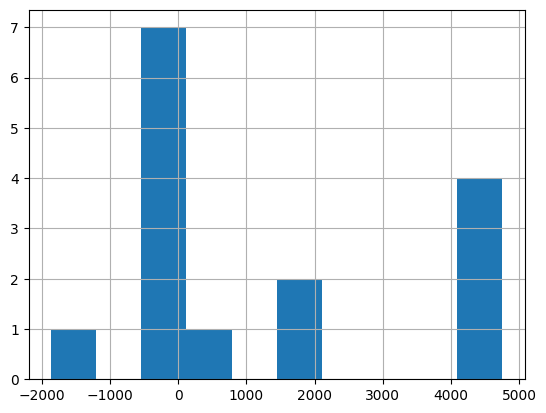

In [ ]:
test['error'].hist()

In [ ]:
test[['error']].describe()

,error
count,15.000000
mean,1238.324445
std,2152.106814
min,-1865.114795
25%,-150.733814
50%,108.854990
75%,2860.947345
max,4751.243858


In [ ]:
np.mean([-2000,2200])

100.0

In [ ]:
test['error'].mean()

1238.3244448200612

##Абсолютная ошибка

In [ ]:
test['error_abs'] = abs(test['error'])

In [ ]:
test

,client,parking_type,invoice_date_month,count,sum,client_id,price_sum,error,error_abs
40,Клиент 3,hozyaystvennoe_vedenie,2019-10-01,1,27350.700,81,31521.905135,4171.205135,4171.205135
85,Клиент 6,hozyaystvennoe_vedenie,2021-06-01,1,48552.000,4,48868.816691,316.816691,316.816691
81,Клиент 6,hozyaystvennoe_vedenie,2021-02-01,1,48552.000,15,48208.749895,-343.250105,343.250105
82,Клиент 6,hozyaystvennoe_vedenie,2021-03-01,1,48552.000,12,48559.831021,7.831021,7.831021
33,Клиент 2,hozyaystvennoe_vedenie,2021-04-01,1,14565.600,10,14674.454990,108.854990,108.854990
36,Клиент 2,hozyaystvennoe_vedenie,2021-07-01,1,14565.600,0,14316.807457,-248.792543,248.792543
83,Клиент 6,hozyaystvennoe_vedenie,2021-04-01,1,48552.000,11,48466.657663,-85.342337,85.342337
60,Клиент 4,narodnyy_garazh,2020-06-01,1,71232.768,39,69367.653205,-1865.114795,1865.114795
97,Клиент 7,hozyaystvennoe_vedenie,2020-05-01,1,7399.224,47,12150.467858,4751.243858,4751.243858
44,Клиент 3,hozyaystvennoe_vedenie,2020-02-01,1,32857.500,62,34401.813659,1544.313659,1544.313659


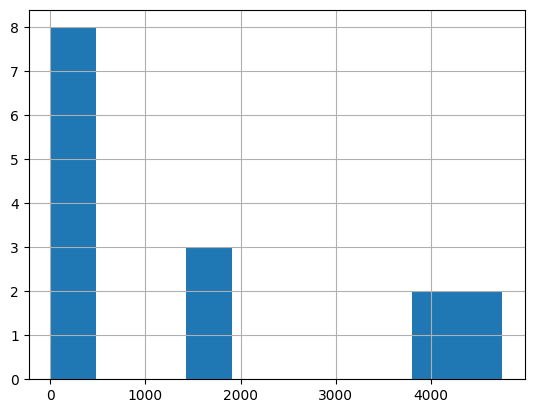

In [ ]:
test['error_abs'].hist()

In [ ]:
test[['error_abs']].describe()

,error_abs
count,15.000000
mean,1606.141121
std,1873.656934
min,7.831021
25%,162.490140
50%,343.250105
75%,3018.159965
max,4751.243858


##Обучаемся на всех данных

In [ ]:
len(train)

69

In [ ]:
len(val)

15

In [ ]:
len(train) + len(val)

84

In [ ]:
train_full = pd.concat([train,val])

In [ ]:
X = ['client', 'parking_type', 'invoice_date_month']

cat_features = ['client', 'parking_type']
y = ['sum']

In [ ]:
parameters = {'cat_features': cat_features,
              'eval_metric': 'MAPE',
              'learning_rate': 0.055,
              'random_seed':42,
              'verbose':100}

In [ ]:
model = CatBoostRegressor(**parameters)

In [ ]:
model.fit(train[X],train[y],eval_set=(val[X],val[y]))

0:	learn: 1.4222951	test: 2.3846853	best: 2.3846853 (0)	total: 1.33ms	remaining: 1.33s
100:	learn: 0.1599465	test: 0.3692405	best: 0.3692405 (100)	total: 64.2ms	remaining: 571ms
200:	learn: 0.0598311	test: 0.2556755	best: 0.2556755 (200)	total: 122ms	remaining: 485ms
300:	learn: 0.0378044	test: 0.2587283	best: 0.2484817 (226)	total: 191ms	remaining: 444ms
400:	learn: 0.0320818	test: 0.2666876	best: 0.2484817 (226)	total: 246ms	remaining: 368ms
500:	learn: 0.0252057	test: 0.2582291	best: 0.2484817 (226)	total: 298ms	remaining: 297ms
600:	learn: 0.0191292	test: 0.2524441	best: 0.2484817 (226)	total: 355ms	remaining: 235ms
700:	learn: 0.0154061	test: 0.2505385	best: 0.2484817 (226)	total: 412ms	remaining: 176ms
800:	learn: 0.0130526	test: 0.2491603	best: 0.2484817 (226)	total: 472ms	remaining: 117ms
900:	learn: 0.0108609	test: 0.2469865	best: 0.2469865 (900)	total: 534ms	remaining: 58.6ms
999:	learn: 0.0087293	test: 0.2469327	best: 0.2465539 (956)	total: 584ms	remaining: 0us

bestTest = 0

In [ ]:
model.best_iteration_

956

In [ ]:
parameters = {'iterations': model.best_iteration_ + 1,
              'cat_features': cat_features,
              'eval_metric': 'MAPE',
              'learning_rate': 0.055,
              'random_seed':42,
              'verbose':100}

In [ ]:
parameters

{'iterations': 957,
 'cat_features': ['client', 'parking_type'],
 'eval_metric': 'MAPE',
 'learning_rate': 0.055,
 'random_seed': 42,
 'verbose': 100}

In [ ]:
model = CatBoostRegressor(**parameters)

In [ ]:
model.fit(train_full[X],train_full[y])

0:	learn: 1.5421184	total: 2.71ms	remaining: 2.59s
100:	learn: 0.1378293	total: 57.9ms	remaining: 491ms
200:	learn: 0.0632866	total: 117ms	remaining: 440ms
300:	learn: 0.0386341	total: 173ms	remaining: 378ms
400:	learn: 0.0283901	total: 244ms	remaining: 339ms
500:	learn: 0.0214132	total: 299ms	remaining: 272ms
600:	learn: 0.0164847	total: 370ms	remaining: 219ms
700:	learn: 0.0138188	total: 428ms	remaining: 156ms
800:	learn: 0.0118874	total: 508ms	remaining: 98.9ms
900:	learn: 0.0096181	total: 560ms	remaining: 34.8ms
956:	learn: 0.0088170	total: 592ms	remaining: 0us


In [ ]:
test['sum_pred_all_features_and_data'] = model.predict(test[X])

In [ ]:
error(test['sum'],test['price_sum'])

mean_absolute_error =  1606.141120882814
mean_absolute_percentage_error =  0.1144875734647158


###Абсолютная ошибка модели

In [ ]:
error(test['sum'],test['sum_pred_all_features_and_data'])

mean_absolute_error =  732.521489554105
mean_absolute_percentage_error =  0.05106960490404378


#####Предварительные вывод catboost

*   Получена модель на основе линейной регрессии, с показателми ошибки 2097 тыс. рублей
*   Анализ ошибок модели говорит о нестабильности резуьльтата, однако возможный наилучший и наихудший сценарий - обозначен 

#Получение предсказания

In [ ]:
#### Для получения предсказания используем данные за 2021 г

In [ ]:
X = ['client', 'parking_type', 'invoice_date_month']
test[X].columns

Index(['client', 'parking_type', 'invoice_date_month'], dtype='object')

In [ ]:
df.columns

Index(['client', 'parking_type', 'invoice_date_month', 'count', 'sum',
       'client_id'],
      dtype='object')

In [ ]:
tt = df.query('invoice_date_month > "2020-07"')[['client','parking_type', 'invoice_date_month']].copy()

In [ ]:
min_dt = tt['invoice_date_month'].min().to_numpy().astype('datetime64[M]')
max_dt = tt['invoice_date_month'].max()

min_dt
max_dt

Timestamp('2021-07-01 00:00:00')

In [ ]:
min_dt

numpy.datetime64('2020-08')

In [ ]:
max_dt + pd.DateOffset(days=366)

Timestamp('2022-07-02 00:00:00')

In [ ]:
tt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 36 to 75
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   client              36 non-null     object        
 1   parking_type        36 non-null     object        
 2   invoice_date_month  36 non-null     datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 1.1+ KB


In [ ]:
tt['invoice_date_month'] = (tt['invoice_date_month']  + pd.DateOffset(days=366))\
.to_numpy()\
.astype('datetime64[M]')

In [ ]:
tt.groupby(['client','parking_type', 'invoice_date_month' ])['invoice_date_month'].count()

client    parking_type            invoice_date_month
Клиент 2  hozyaystvennoe_vedenie  2021-08-01            1
                                  2021-09-01            1
                                  2021-10-01            1
                                  2021-11-01            1
                                  2021-12-01            1
                                  2022-01-01            1
                                  2022-02-01            1
                                  2022-03-01            1
                                  2022-04-01            1
                                  2022-05-01            1
                                  2022-06-01            1
                                  2022-07-01            1
Клиент 5  narodnyy_garazh         2021-08-01            1
                                  2021-09-01            1
                                  2021-10-01            1
                                  2021-11-01            1
                   

In [ ]:
tt.sort_values('invoice_date_month')

,client,parking_type,invoice_date_month
75,Клиент 6,hozyaystvennoe_vedenie,2021-08-01
62,Клиент 5,narodnyy_garazh,2021-08-01
25,Клиент 2,hozyaystvennoe_vedenie,2021-08-01
26,Клиент 2,hozyaystvennoe_vedenie,2021-09-01
63,Клиент 5,narodnyy_garazh,2021-09-01
76,Клиент 6,hozyaystvennoe_vedenie,2021-09-01
77,Клиент 6,hozyaystvennoe_vedenie,2021-10-01
27,Клиент 2,hozyaystvennoe_vedenie,2021-10-01
64,Клиент 5,narodnyy_garazh,2021-10-01
78,Клиент 6,hozyaystvennoe_vedenie,2021-11-01


In [ ]:
tt['sum_pred_2022'] = model.predict(tt[X])

In [ ]:
tt.head()

,client,parking_type,invoice_date_month,sum_pred_2022
36,Клиент 2,hozyaystvennoe_vedenie,2022-07-01,16061.178884
86,Клиент 6,hozyaystvennoe_vedenie,2022-07-01,49941.814480
73,Клиент 5,narodnyy_garazh,2022-07-01,131224.561660
35,Клиент 2,hozyaystvennoe_vedenie,2022-06-01,16061.178884
85,Клиент 6,hozyaystvennoe_vedenie,2022-06-01,49941.814480


In [ ]:
tt.to_excel('sum_pred_2022.xls')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  """Entry point for launching an IPython kernel.


In [ ]:
df.head()

,client,parking_type,invoice_date_month,count,sum,client_id
36,Клиент 2,hozyaystvennoe_vedenie,2021-07-01,1,14565.6,0
86,Клиент 6,hozyaystvennoe_vedenie,2021-07-01,1,48552.0,1
73,Клиент 5,narodnyy_garazh,2021-07-01,1,131880.0,2
35,Клиент 2,hozyaystvennoe_vedenie,2021-06-01,1,14565.6,3
85,Клиент 6,hozyaystvennoe_vedenie,2021-06-01,1,48552.0,4


####Анализ предсказания относительно существующих данных_Выводы

In [ ]:
df['invoice_date_year'] = df['invoice_date_month'].to_numpy().astype('datetime64[Y]')

In [ ]:
df.groupby('invoice_date_year')['sum'].sum()

invoice_date_year
2019-01-01     721229.880
2020-01-01    2127936.034
2021-01-01    1364908.048
Name: sum, dtype: float64

In [ ]:
h = tt['sum_pred_2022'].sum()
h

2366730.660282139

In [ ]:
print(f''' диопазон предсказаний находится между
{int(h - 2097.87369008212)} тыс.рублей и
{int(h + 2097.87369008212)} тыс.рублей ''')

 диопазон предсказаний находится между
2364632 тыс.рублей и
2368828 тыс.рублей 


#####Предварительные вывод

*    Диопазон предсказаний находится между 2364632 тыс.рублей и 2368828 тыс.рублей 
*   Сужение диопазона возможно благодаря подбору параметров обучения модели и применение коросс валидации 

#Получение выборок для сравнения

In [ ]:
# Найдены существенные различия между клиентами, собираем в группы

In [ ]:
l = ['client_id', 'client','invoice_date_month','parking_type','sum' , 'error_abs']
df1 = test.sort_values(['error_abs'], ascending = False)[l].head(7)

df1

,client_id,client,invoice_date_month,parking_type,sum,error_abs
97,47,Клиент 7,2020-05-01,hozyaystvennoe_vedenie,7399.224,4751.243858
12,97,Клиент 2,2019-07-01,hozyaystvennoe_vedenie,8736.000,4623.074926
41,76,Клиент 3,2019-11-01,hozyaystvennoe_vedenie,28236.000,4228.756003
40,81,Клиент 3,2019-10-01,hozyaystvennoe_vedenie,27350.700,4171.205135
60,39,Клиент 4,2020-06-01,narodnyy_garazh,71232.768,1865.114795
14,84,Клиент 2,2019-09-01,hozyaystvennoe_vedenie,12516.140,1550.689556
44,62,Клиент 3,2020-02-01,hozyaystvennoe_vedenie,32857.500,1544.313659


In [ ]:
df1 = df1[['client_id','client','invoice_date_month','parking_type','sum']].copy()
print(len(df1))
df1

7


,client_id,client,invoice_date_month,parking_type,sum
97,47,Клиент 7,2020-05-01,hozyaystvennoe_vedenie,7399.224
12,97,Клиент 2,2019-07-01,hozyaystvennoe_vedenie,8736.000
41,76,Клиент 3,2019-11-01,hozyaystvennoe_vedenie,28236.000
40,81,Клиент 3,2019-10-01,hozyaystvennoe_vedenie,27350.700
60,39,Клиент 4,2020-06-01,narodnyy_garazh,71232.768
14,84,Клиент 2,2019-09-01,hozyaystvennoe_vedenie,12516.140
44,62,Клиент 3,2020-02-01,hozyaystvennoe_vedenie,32857.500


In [ ]:
df2 = KMeans_df.copy()

df2.head()

,client,parking_type,invoice_date_month,count,sum,client_id,client_dist,k3
36,Клиент 2,hozyaystvennoe_vedenie,2021-07-01,1,14565.6,0,0.111012,1
86,Клиент 6,hozyaystvennoe_vedenie,2021-07-01,1,48552.0,1,0.130851,0
73,Клиент 5,narodnyy_garazh,2021-07-01,1,131880.0,2,0.105958,2
35,Клиент 2,hozyaystvennoe_vedenie,2021-06-01,1,14565.6,3,0.124217,1
85,Клиент 6,hozyaystvennoe_vedenie,2021-06-01,1,48552.0,4,0.164252,0


In [ ]:
l = ['client_id','client', 'parking_type','invoice_date_month', 'sum', 'k3']
df2 = df2[l]

df2.head()

,client_id,client,parking_type,invoice_date_month,sum,k3
36,0,Клиент 2,hozyaystvennoe_vedenie,2021-07-01,14565.6,1
86,1,Клиент 6,hozyaystvennoe_vedenie,2021-07-01,48552.0,0
73,2,Клиент 5,narodnyy_garazh,2021-07-01,131880.0,2
35,3,Клиент 2,hozyaystvennoe_vedenie,2021-06-01,14565.6,1
85,4,Клиент 6,hozyaystvennoe_vedenie,2021-06-01,48552.0,0


In [ ]:
df2.groupby(['client','k3'])\
.agg({'sum':'count'})

sum
client   k3     
Клиент 1 0    10
         1     2
Клиент 2 1    25
Клиент 3 0     7
         1     5
Клиент 4 0    12
Клиент 5 2    13
Клиент 6 0    13
Клиент 7 1    12

In [ ]:
df2 = df2[(df2['client'] == "Клиент 1") & (df2['k3'] == 1) | (df2['client'] == "Клиент 3")].copy()
print(len(df2))
df2

14


,client_id,client,parking_type,invoice_date_month,sum,k3
48,42,Клиент 3,hozyaystvennoe_vedenie,2020-06-01,37151.58,0
47,45,Клиент 3,hozyaystvennoe_vedenie,2020-05-01,36996.12,0
46,49,Клиент 3,hozyaystvennoe_vedenie,2020-04-01,36307.80,0
45,54,Клиент 3,hozyaystvennoe_vedenie,2020-03-01,34638.60,0
44,62,Клиент 3,hozyaystvennoe_vedenie,2020-02-01,32857.50,0
43,65,Клиент 3,hozyaystvennoe_vedenie,2020-01-01,32081.40,0
42,71,Клиент 3,hozyaystvennoe_vedenie,2019-12-01,31051.80,0
41,76,Клиент 3,hozyaystvennoe_vedenie,2019-11-01,28236.00,1
40,81,Клиент 3,hozyaystvennoe_vedenie,2019-10-01,27350.70,1
39,88,Клиент 3,hozyaystvennoe_vedenie,2019-09-01,26820.30,1


####Собираем Группу А и группу Б

In [ ]:
df_A = df1.merge(df2,how='outer',on=['client_id','client','invoice_date_month', 'parking_type', 'sum'])
print(len(df_A))
df_A

18


,client_id,client,invoice_date_month,parking_type,sum,k3
0,47,Клиент 7,2020-05-01,hozyaystvennoe_vedenie,7399.224,NaN
1,97,Клиент 2,2019-07-01,hozyaystvennoe_vedenie,8736.000,NaN
2,76,Клиент 3,2019-11-01,hozyaystvennoe_vedenie,28236.000,1.0
3,81,Клиент 3,2019-10-01,hozyaystvennoe_vedenie,27350.700,1.0
4,39,Клиент 4,2020-06-01,narodnyy_garazh,71232.768,NaN
5,84,Клиент 2,2019-09-01,hozyaystvennoe_vedenie,12516.140,NaN
6,62,Клиент 3,2020-02-01,hozyaystvennoe_vedenie,32857.500,0.0
7,42,Клиент 3,2020-06-01,hozyaystvennoe_vedenie,37151.580,0.0
8,45,Клиент 3,2020-05-01,hozyaystvennoe_vedenie,36996.120,0.0
9,49,Клиент 3,2020-04-01,hozyaystvennoe_vedenie,36307.800,0.0


In [ ]:
l = list(df_A['client_id'])
l

[47, 97, 76, 81, 39, 84, 62, 42, 45, 49, 54, 65, 71, 88, 90, 92, 94, 96]

In [ ]:
def fanction_2_columns(row):
    return row['client_id'] in l

# функция применяется ко всему df и работает применяемая логика базируется на значениях 2 и более столбцов

In [ ]:
df['key_new'] = df.apply(fanction_2_columns, axis =1)
df_B = df[df['key_new'] == False]

df_B.head()

,client,parking_type,invoice_date_month,count,sum,client_id,invoice_date_year,key_new
36,Клиент 2,hozyaystvennoe_vedenie,2021-07-01,1,14565.6,0,2021-01-01,False
86,Клиент 6,hozyaystvennoe_vedenie,2021-07-01,1,48552.0,1,2021-01-01,False
73,Клиент 5,narodnyy_garazh,2021-07-01,1,131880.0,2,2021-01-01,False
35,Клиент 2,hozyaystvennoe_vedenie,2021-06-01,1,14565.6,3,2021-01-01,False
85,Клиент 6,hozyaystvennoe_vedenie,2021-06-01,1,48552.0,4,2021-01-01,False


In [ ]:
len(df_B) + len(df_A)

99

In [ ]:
len(df)

99

#A_B_test

df_A['sum'].mean  28717


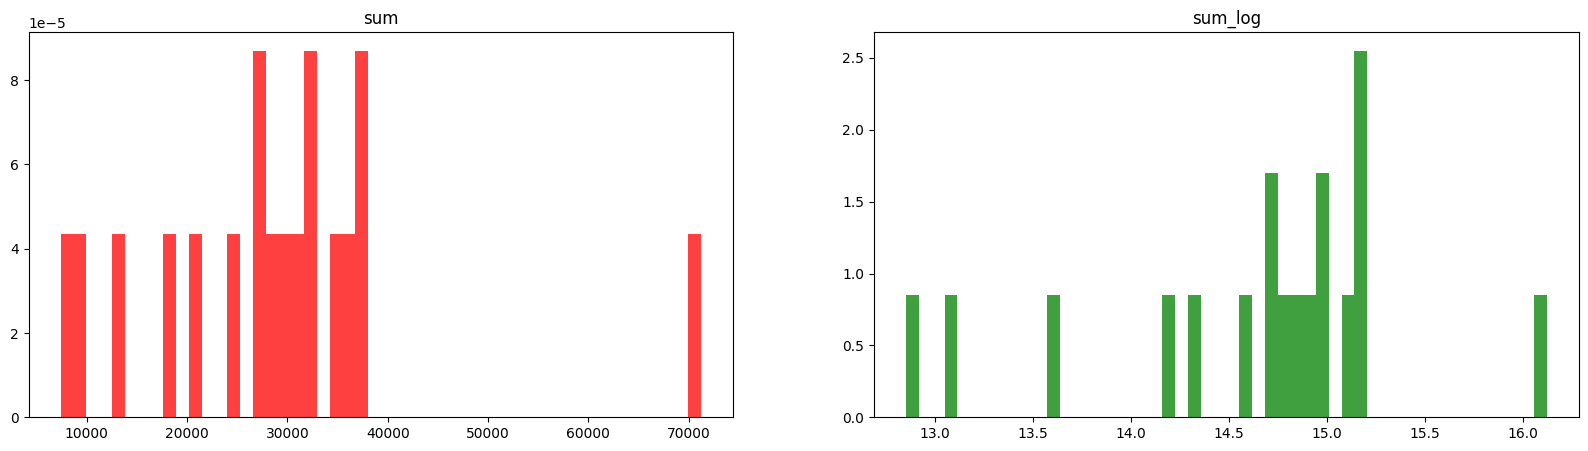

In [ ]:
print(f'''df_A['sum'].mean  {int(df_A['sum'].mean())}''')
df_A['sum_log'] = np.log2(df_A['sum'])

fig, axes = plt.subplots(1, 2, figsize=(20, 5))

axes[0].hist(df_A['sum'], 50, density=True, facecolor='r', alpha=0.75)
axes[0].set_title("sum")

axes[1].hist(df_A['sum_log'], 50, density=True, facecolor='g', alpha=0.75)
axes[1].set_title("sum_log")

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


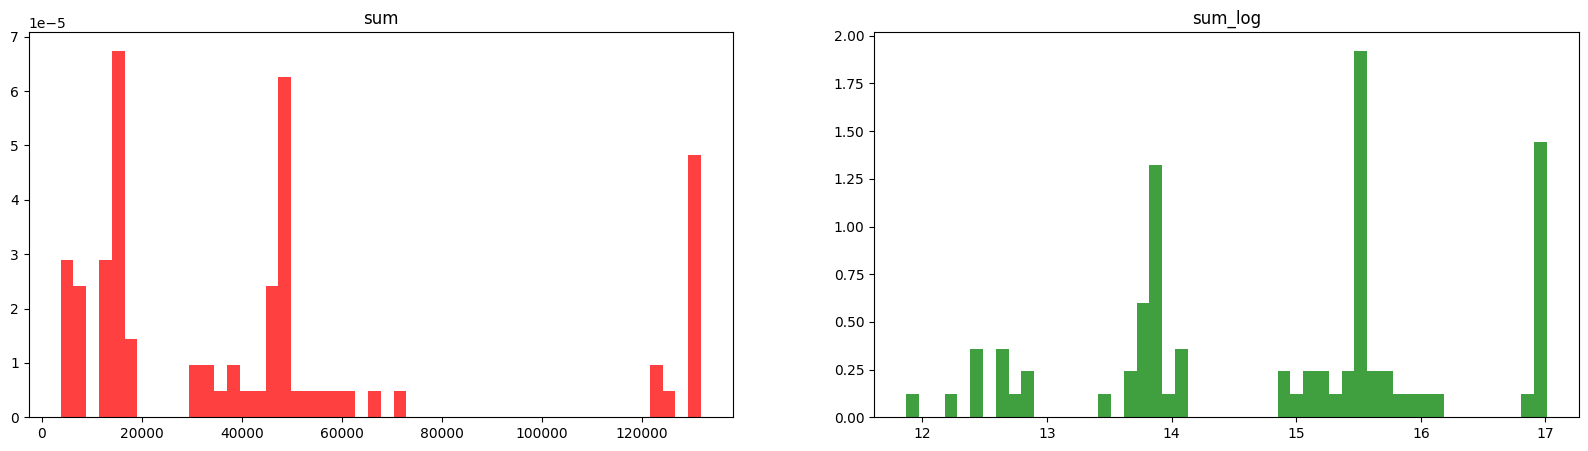

In [ ]:
df_B['sum_log'] = np.log2(df_B['sum'])

fig, axes = plt.subplots(1, 2, figsize=(20, 5))

axes[0].hist(df_B['sum'], 50, density=True, facecolor='r', alpha=0.75)
axes[0].set_title("sum")

axes[1].hist(df_B['sum_log'], 50, density=True, facecolor='g', alpha=0.75)
axes[1].set_title("sum_log")

plt.show()

Необходимый нам размер выборки оценивается с помощью так называемого анализа мощности и зависит от нескольких факторов:

power - Мощность теста (1 — β) — это вероятность обнаружения статистической
разницы между группами в нашем тесте, когда разница действительно присутствует. По соглашению это обычно устанавливается равным 0,8 (вот дополнительная информация о статистической мощности , если вам интересно)

---


alpha - Значение альфа (α) — критическое значение, которое мы установили ранее, равное 0,05.

---


Размер эффекта — насколько велика ожидаемая разница между коэффициентами конверсии.

In [ ]:
import statsmodels.stats.api as sms 
from math import ceil 

In [ ]:
effect_size = sms.proportion_effectsize(0.15, 0.13)
# Расчет размера эффекта на основе наших ожидаемых показателей изменение конверсии с 13% до 15% 
required_n = sms.NormalIndPower().solve_power( 
    effect_size, 
    power=0.8, 
    alpha=0.05, 
    ratio=1 
    )
    # Расчет необходимого размера выборки 

required_n = ceil(required_n) # Округление до следующего целого числа                           

required_n # Посчитали размер группы который нам нужен для расчета статистически значимого резульатата

4720

In [ ]:
from scipy import stats

In [ ]:
np.std(df_B['sum_log'])

1.4086961160376599

In [ ]:
#### Материалы по расчету размера выбоки

In [ ]:
n_A = 10000
df_A_sample_10000 = pd.DataFrame()
df_B_sample_10000 = pd.DataFrame()

tA_df_3 = []
tA_df_6 = []
tA_df_9 = []

tB_df_3 = []
tB_df_6 = []
tB_df_9 = []
for i in range(n_A):
  tA_df_3.append( df_A['sum_log'].sample(n=3).mean() )
  tA_df_6.append( df_A['sum_log'].sample(n=6).mean() )
  tA_df_9.append( df_A['sum_log'].sample(n=9).mean() )
  
  tB_df_3.append( df_B['sum_log'].sample(n=3).mean() )
  tB_df_6.append( df_B['sum_log'].sample(n=6).mean() )
  tB_df_9.append( df_B['sum_log'].sample(n=9).mean() )

df_A_sample_10000['df_3_sum_log'] = tA_df_3
df_A_sample_10000['df_6_sum_log'] = tA_df_6
df_A_sample_10000['df_9_sum_log'] = tA_df_9

df_B_sample_10000['df_3_sum_log'] = tB_df_3
df_B_sample_10000['df_6_sum_log'] = tB_df_6
df_B_sample_10000['df_9_sum_log'] = tB_df_9

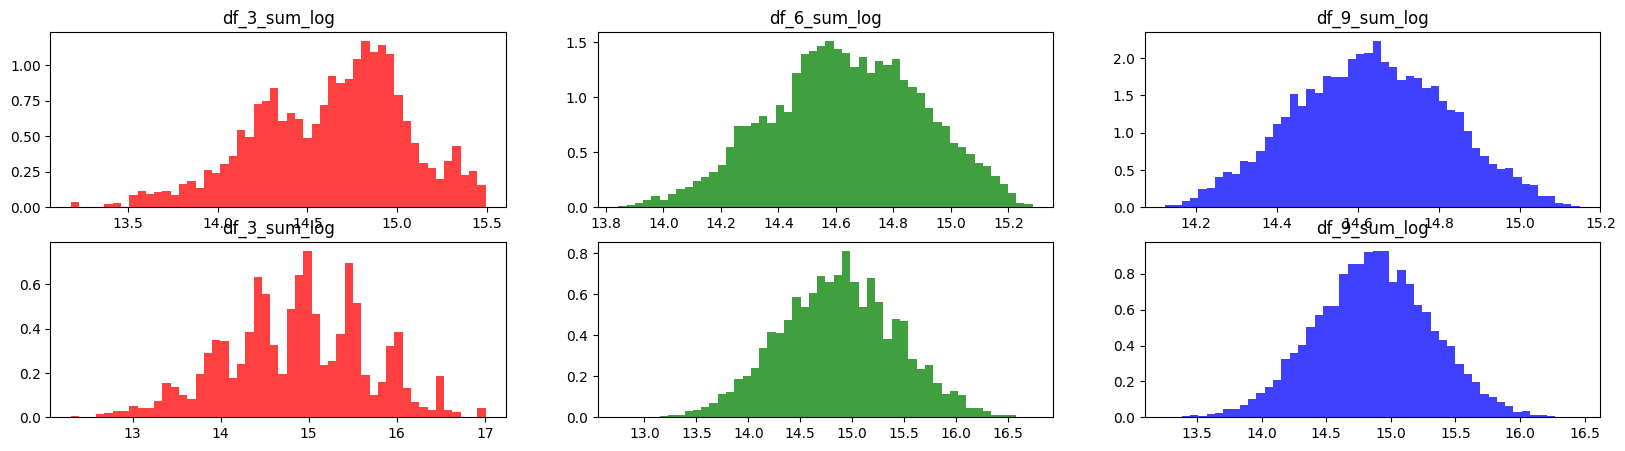

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20, 5))

axes[0,0].hist(df_A_sample_10000['df_3_sum_log'], 50, density=True, facecolor='r', alpha=0.75)
axes[0,0].set_title("df_3_sum_log")

axes[0,1].hist(df_A_sample_10000['df_6_sum_log'], 50, density=True, facecolor='g', alpha=0.75)
axes[0,1].set_title("df_6_sum_log")

axes[0,2].hist(df_A_sample_10000['df_9_sum_log'], 50, density=True, facecolor='b', alpha=0.75)
axes[0,2].set_title("df_9_sum_log");

axes[1,0].hist(df_B_sample_10000['df_3_sum_log'], 50, density=True, facecolor='r', alpha=0.75)
axes[1,0].set_title("df_3_sum_log")

axes[1,1].hist(df_B_sample_10000['df_6_sum_log'], 50, density=True, facecolor='g', alpha=0.75)
axes[1,2].set_title("df_6_sum_log")

axes[1,2].hist(df_B_sample_10000['df_9_sum_log'], 50, density=True, facecolor='b', alpha=0.75)
axes[1,2].set_title("df_9_sum_log");

plt.show()

In [ ]:
#df_control, sigma_control, size = 101, 8, 400
#t = (np.mean(intake)-7725)/(intake.std(ddof=1)/np.sqrt(len(intake)))

In [ ]:
import pylab
import statsmodels.api as sm

In [ ]:
df_B_mean = df_B_sample_10000['df_9_sum_log'].mean()
df_B_std = df_B_sample_10000['df_9_sum_log'].std()
df_B_len = len(df_B_sample_10000['df_9_sum_log'])
df_B_sample_10000['df_9_sum_log_z'] = (df_B_sample_10000['df_9_sum_log'] - df_B_mean)/df_B_std
df_B_std

0.4467070858019822

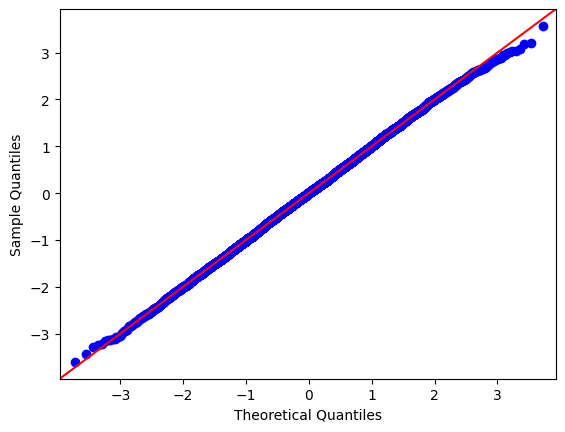

In [ ]:
sm.qqplot(df_B_sample_10000['df_9_sum_log_z'], line ='45')
pylab.show()

In [ ]:
df_A_mean = df_A_sample_10000['df_9_sum_log'].mean()
df_A_std = df_A_sample_10000['df_9_sum_log'].std()
df_A_len = len(df_B_sample_10000['df_9_sum_log'])
df_A_sample_10000['df_9_sum_log_z'] = (df_A_sample_10000['df_9_sum_log'] - df_A_mean)/df_A_std
df_A_std

0.1868405975013678

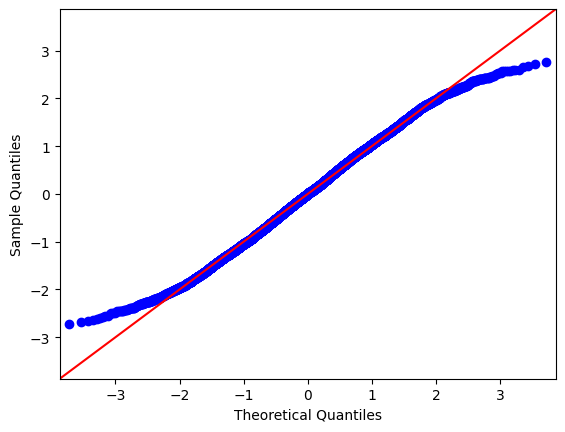

In [ ]:
sm.qqplot(df_A_sample_10000['df_9_sum_log_z'], line ='45')
pylab.show()

#Тест Колмогорова-Смирнова

In [ ]:
print(f'''Поскольку p-значение больше 0,05, мы принимаем нулевую гипотезу.
У нас есть достаточно доказательств, чтобы сказать, что два выборочных
набора данных происходят из одного и того же распределения.
''')

stats.ks_2samp(df_A_sample_10000['df_9_sum_log_z'], df_B_sample_10000['df_9_sum_log_z'])

Поскольку p-значение больше 0,05, мы принимаем нулевую гипотезу.
У нас есть достаточно доказательств, чтобы сказать, что два выборочных
набора данных происходят из одного и того же распределения.



KstestResult(statistic=0.0177, pvalue=0.08717458640626448)

Это тест гипотез, две гипотезы заключаются в следующем:

Ho (принято): выборка из нормального распределения (Po>0,05).
Ho(Отклонено): выборка не из нормального распределения.

#Функции для печати

In [ ]:
def print_rez_shapiro(test_s):
  print(f'''statistic = {test_s[0]}
pval = {test_s[1]}''')
  if test_s[1] >= 0.05: print('Выборка из нормального распределения (Po>0,05)')
  else: print('выборка не из нормального распределения')

In [ ]:
def print_rez_ttest_mannwhitneyu():
  print(f'''statistic = {statistic}
pval = {pval}''')
  if pval >= 0.05: print('Cреднее значение совокупности набора данных1 равно набору данных2')
  else: print('среднее значение совокупности набора данных1 отличается от набора данных2')

## тестируем чистую сумму

In [ ]:
rvs1 = np.array(df_A['sum'])
rvs2 = np.array(df_B['sum'])

In [ ]:
shapiro_test_rvs1 = stats.shapiro(rvs1)
print_rez_shapiro(shapiro_test_rvs1)

statistic = 0.8655258417129517
pval = 0.015027603134512901
выборка не из нормального распределения


In [ ]:
shapiro_test_rvs2 = stats.shapiro(rvs2)
print_rez_shapiro(shapiro_test_rvs2)

statistic = 0.7886384129524231
pval = 1.966949492171466e-09
выборка не из нормального распределения


In [ ]:
statistic, pval =  stats.ttest_ind(rvs1,rvs2, equal_var = False) #Делаем Т-тест

print_rez_ttest_mannwhitneyu()

statistic = -3.0004223009890385
pval = 0.0035863778067240105
среднее значение совокупности набора данных1 отличается от набора данных2


In [ ]:
statistic, pval =  stats.mannwhitneyu(rvs1,rvs2) #Делаем mannwhitneyu

print_rez_ttest_mannwhitneyu()

statistic = 602.0
pval = 0.2509668735261551
Cреднее значение совокупности набора данных1 равно набору данных2


## тестируем логорифмированную сумму

In [ ]:
rvs1 = np.array(df_A['sum_log'])
rvs2 = np.array(df_B['sum_log'])

In [ ]:
shapiro_test_rvs1 = stats.shapiro(rvs1)
print_rez_shapiro(shapiro_test_rvs1)

statistic = 0.8905218839645386
pval = 0.03939609229564667
выборка не из нормального распределения


In [ ]:
shapiro_test_rvs2 = stats.shapiro(rvs2)
print_rez_shapiro(shapiro_test_rvs2)

statistic = 0.932860791683197
pval = 0.00037252192851155996
выборка не из нормального распределения


In [ ]:
statistic, pval =  stats.ttest_ind(rvs1,rvs2, equal_var = False) #Делаем Т-тест

print_rez_ttest_mannwhitneyu()

statistic = -0.9467034014244002
pval = 0.3488158087632741
Cреднее значение совокупности набора данных1 равно набору данных2


In [ ]:
statistic, pval =  stats.mannwhitneyu(rvs1,rvs2) #Делаем mannwhitneyu
print_rez_ttest_mannwhitneyu()

statistic = 602.0
pval = 0.2509668735261551
Cреднее значение совокупности набора данных1 равно набору данных2


## тестируем логорифмированную сумму из 10 000 выборки по 9

In [ ]:
rvs1 = df_A_sample_10000['df_9_sum_log']
rvs2 = df_B_sample_10000['df_9_sum_log']

In [ ]:
shapiro_test_rvs1 = stats.shapiro(rvs1)

print_rez_shapiro(shapiro_test_rvs1)

statistic = 0.9961594939231873
pval = 1.3991275399669956e-15
выборка не из нормального распределения


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
shapiro_test_rvs2 = stats.shapiro(rvs2)

print_rez_shapiro(shapiro_test_rvs2)

statistic = 0.9997509717941284
pval = 0.28230297565460205
Выборка из нормального распределения (Po>0,05)


In [ ]:
statistic, pval =  stats.ttest_ind(rvs1,rvs2, equal_var = False) #Делаем Т-тест

print_rez_ttest_mannwhitneyu()

statistic = -48.21593811447786
pval = 0.0
среднее значение совокупности набора данных1 отличается от набора данных2


In [ ]:
statistic, pval =  stats.mannwhitneyu(rvs1,rvs2) #Делаем mannwhitneyu

print_rez_ttest_mannwhitneyu()

statistic = 31405695.0
pval = 0.0
среднее значение совокупности набора данных1 отличается от набора данных2


In [ ]:
import statistics
statistics.pvariance(df_A_sample_10000['df_9_sum_log'])
statistics.pvariance(df_B_sample_10000['df_9_sum_log'])
df_A_sample_10000['df_9_sum_log'].mean()
df_B_sample_10000['df_9_sum_log'].mean()

14.86575139570753

In [ ]:
from statsmodels.stats.power import TTestIndPower

In [ ]:
mu_control,    sigma_control    = df_A_sample_10000['df_9_sum_log'].mean(), statistics.pvariance(df_A_sample_10000['df_9_sum_log'])
mu_experiment, sigma_experiment = df_B_sample_10000['df_9_sum_log'].mean(), statistics.pvariance(df_B_sample_10000['df_9_sum_log'])

d = (mu_experiment - mu_control) / ((sigma_control**2 + sigma_experiment**2) / 2) ** 0.5
print('effect: %.3f' % d)

effect = d
alpha = 0.05
power = 0.95
# perform power analysis
analysis = TTestIndPower()
result = analysis.solve_power(effect, power=power, nobs1=None, ratio=1.0, alpha=alpha)
print('Sample Size: %.3f' % result)

n_control = 18
n_experiment = 5
total_trials = 1000
n_positive = 0
for i in range(total_trials):
    daily_data_control = np.random.normal(mu_control, sigma_control, n_control)
    daily_data_experiment = np.random.normal(mu_experiment, sigma_experiment, n_experiment)

    fit = stats.ttest_ind(daily_data_control, daily_data_experiment)
    
    if fit[1] < 0.05:
        n_positive += 1

n_positive / total_trials

effect: 1.630
Sample Size: 10.845


0.934

#####Предварительные вывод А/В тест

*    При переходе к тестированию были оценены размеры выборок, характер распределений и найдены статистически значимые отличия в группах
*   Выборки обладают приближенными к нормальным распределения

#Есть ли разница межлу группами parking_type?

In [ ]:
df.head()

,client,parking_type,invoice_date_month,count,sum,client_id,invoice_date_year,key_new
36,Клиент 2,hozyaystvennoe_vedenie,2021-07-01,1,14565.6,0,2021-01-01,False
86,Клиент 6,hozyaystvennoe_vedenie,2021-07-01,1,48552.0,1,2021-01-01,False
73,Клиент 5,narodnyy_garazh,2021-07-01,1,131880.0,2,2021-01-01,False
35,Клиент 2,hozyaystvennoe_vedenie,2021-06-01,1,14565.6,3,2021-01-01,False
85,Клиент 6,hozyaystvennoe_vedenie,2021-06-01,1,48552.0,4,2021-01-01,False


In [ ]:
df.columns

Index(['client', 'parking_type', 'invoice_date_month', 'count', 'sum',
       'client_id', 'invoice_date_year', 'key_new'],
      dtype='object')

In [ ]:
l = ['client', 'parking_type', 'invoice_date_month', 'sum', 'client_id', 'invoice_date_year']

df = df[l]

df.head()

,client,parking_type,invoice_date_month,sum,client_id,invoice_date_year
36,Клиент 2,hozyaystvennoe_vedenie,2021-07-01,14565.6,0,2021-01-01
86,Клиент 6,hozyaystvennoe_vedenie,2021-07-01,48552.0,1,2021-01-01
73,Клиент 5,narodnyy_garazh,2021-07-01,131880.0,2,2021-01-01
35,Клиент 2,hozyaystvennoe_vedenie,2021-06-01,14565.6,3,2021-01-01
85,Клиент 6,hozyaystvennoe_vedenie,2021-06-01,48552.0,4,2021-01-01


In [ ]:
df_A_hoz = df.query('parking_type == "hozyaystvennoe_vedenie"').copy()
df_B_nar = df.query('parking_type == "narodnyy_garazh"').copy()
df_A_hoz.head()

,client,parking_type,invoice_date_month,sum,client_id,invoice_date_year
36,Клиент 2,hozyaystvennoe_vedenie,2021-07-01,14565.6,0,2021-01-01
86,Клиент 6,hozyaystvennoe_vedenie,2021-07-01,48552.0,1,2021-01-01
35,Клиент 2,hozyaystvennoe_vedenie,2021-06-01,14565.6,3,2021-01-01
85,Клиент 6,hozyaystvennoe_vedenie,2021-06-01,48552.0,4,2021-01-01
34,Клиент 2,hozyaystvennoe_vedenie,2021-05-01,14565.6,6,2021-01-01


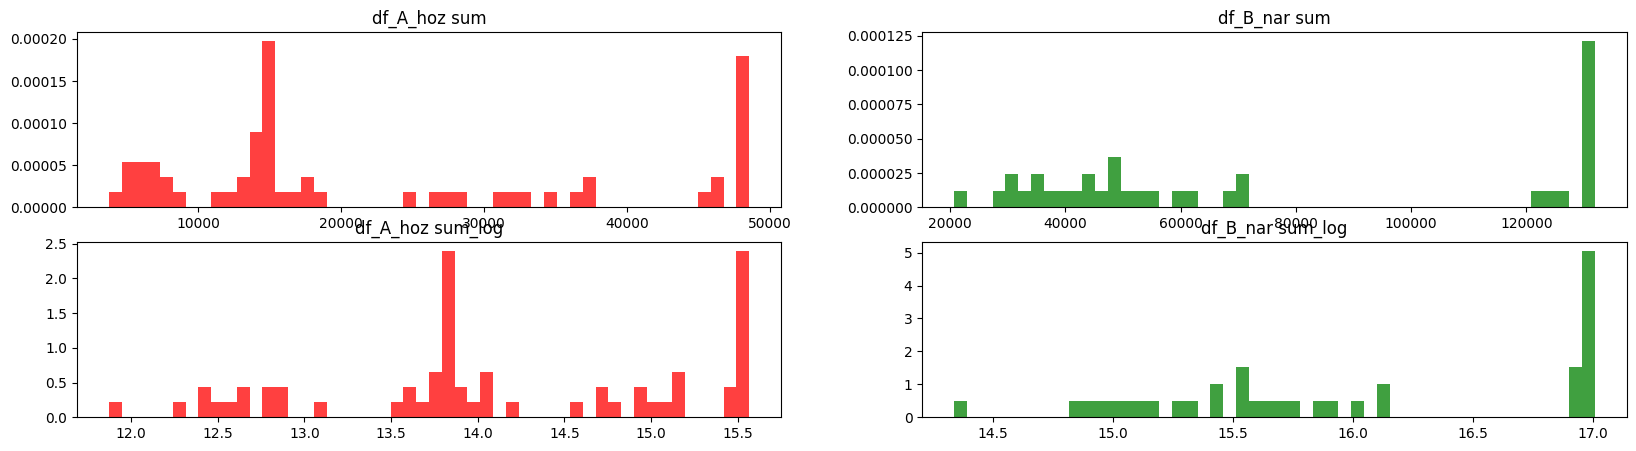

In [ ]:
df_A_hoz['sum_log'] = np.log2(df_A_hoz['sum'])
df_B_nar['sum_log'] = np.log2(df_B_nar['sum'])

fig, axes = plt.subplots(2, 2, figsize=(20, 5))

axes[0,0].hist(df_A_hoz['sum'], 50, density=True, facecolor='r', alpha=0.75)
axes[0,0].set_title("df_A_hoz sum")

axes[0,1].hist(df_B_nar['sum'], 50, density=True, facecolor='g', alpha=0.75)
axes[0,1].set_title("df_B_nar sum")

axes[1,0].hist(df_A_hoz['sum_log'], 50, density=True, facecolor='r', alpha=0.75)
axes[1,0].set_title("df_A_hoz sum_log")

axes[1,1].hist(df_B_nar['sum_log'], 50, density=True, facecolor='g', alpha=0.75)
axes[1,1].set_title("df_B_nar sum_log")

plt.show()

In [ ]:
rvs1 = np.array(df_A_hoz['sum'])
rvs2 = np.array(df_B_nar['sum'])

In [ ]:
shapiro_test_rvs1 = stats.shapiro(rvs1)
print_rez_shapiro(shapiro_test_rvs1)

statistic = 0.8436780571937561
pval = 1.4506873640129925e-06
выборка не из нормального распределения


In [ ]:
shapiro_test_rvs2 = stats.shapiro(rvs2)
print_rez_shapiro(shapiro_test_rvs2)

statistic = 0.7959154844284058
pval = 1.0797841241583228e-05
выборка не из нормального распределения


In [ ]:
statistic, pval =  stats.ttest_ind(rvs1,rvs2, equal_var = False) #Делаем Т-тест

print_rez_ttest_mannwhitneyu()

statistic = -7.303597125803722
pval = 5.488676819139573e-09
среднее значение совокупности набора данных1 отличается от набора данных2


In [ ]:
statistic, pval =  stats.mannwhitneyu(rvs1,rvs2) #Делаем mannwhitneyu

print_rez_ttest_mannwhitneyu()

statistic = 229.0
pval = 3.1784290671360885e-11
среднее значение совокупности набора данных1 отличается от набора данных2


In [ ]:
rvs1 = np.array(df_A_hoz['sum_log'])
rvs2 = np.array(df_B_nar['sum_log'])

In [ ]:
shapiro_test_rvs1 = stats.shapiro(rvs1)

print_rez_shapiro(shapiro_test_rvs1)

statistic = 0.9234100580215454
pval = 0.0008535900269635022
выборка не из нормального распределения


In [ ]:
shapiro_test_rvs2 = stats.shapiro(rvs2)

print_rez_shapiro(shapiro_test_rvs2)

statistic = 0.8765659332275391
pval = 0.0007002773927524686
выборка не из нормального распределения


In [ ]:
statistic, pval =  stats.ttest_ind(rvs1,rvs2, equal_var = False) #Делаем Т-тест

print_rez_ttest_mannwhitneyu()

statistic = -9.588087337164417
pval = 2.1740135757012087e-15
среднее значение совокупности набора данных1 отличается от набора данных2


In [ ]:
statistic, pval =  stats.mannwhitneyu(rvs1,rvs2) #Делаем mannwhitneyu

print_rez_ttest_mannwhitneyu()

statistic = 229.0
pval = 3.1784290671360885e-11
среднее значение совокупности набора данных1 отличается от набора данных2


In [ ]:
mu_control,    sigma_control    = rvs1.mean(), statistics.pvariance(rvs1)
mu_experiment, sigma_experiment = rvs2.mean(), statistics.pvariance(rvs2)

d = (mu_experiment - mu_control) / ((sigma_control**2 + sigma_experiment**2) / 2) ** 0.5
print('effect: %.3f' % d)

effect = d
alpha = 0.05
power = 0.95
# perform power analysis
analysis = TTestIndPower()
result = analysis.solve_power(effect, power=power, nobs1=None, ratio=1.0, alpha=alpha)
print('Sample Size: %.3f' % result)

n_control = 18
n_experiment = 5
total_trials = 1000
n_positive = 0
for i in range(total_trials):
    daily_data_control = np.random.normal(mu_control, sigma_control, n_control)
    daily_data_experiment = np.random.normal(mu_experiment, sigma_experiment, n_experiment)

    fit = stats.ttest_ind(daily_data_control, daily_data_experiment)
    
    if fit[1] < 0.05:
        n_positive += 1

n_positive / total_trials

effect: 2.014
Sample Size: 7.519


0.951

#####Предварительные вывод А/В тест

*    При переходе к тестированию были оценены размеры выборок, характер распределений и найдены статистически значимые отличия в группах
*   Выборки обладают приближенными к нормальным распределения